In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, normaltest, kstest, spearmanr, kruskal
from scipy import stats

In [2]:
# Read data CSV Saas Sales

df_saas_sales = pd.read_csv('SaaS-Sales.csv')

df_saas_sales.head()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


In [3]:
# Memahami data menggunakan .info() untuk melihat tipe data setiap kolom
# Melihat apakah ada kolom yang tidak sesuai tipe datanya

df_saas_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

In [4]:
# Mengubah tipe data menjadi tipe data yang benar
# Order Date sebelumnya memiliki tipe data object, seharusnya Order Date memiliki tipe data datetime
# Order ID sebelumnya memiliki tipe data object, seharusnya Order ID memiliki tipe data int64

df_saas_sales['Order Date'] = pd.to_datetime(df_saas_sales['Order Date'])
df_saas_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        9994 non-null   int64         
 1   Order ID      9994 non-null   object        
 2   Order Date    9994 non-null   datetime64[ns]
 3   Date Key      9994 non-null   int64         
 4   Contact Name  9994 non-null   object        
 5   Country       9994 non-null   object        
 6   City          9994 non-null   object        
 7   Region        9994 non-null   object        
 8   Subregion     9994 non-null   object        
 9   Customer      9994 non-null   object        
 10  Customer ID   9994 non-null   int64         
 11  Industry      9994 non-null   object        
 12  Segment       9994 non-null   object        
 13  Product       9994 non-null   object        
 14  License       9994 non-null   object        
 15  Sales         9994 non-null   float64 

In [5]:
# Drop kolom yang tidak dibutuhkan untuk analisis: Row ID dan Date Key
# Alasan drop Row ID: Karena valuenya adalah angka untuk setiap baris yang sebenarnya sudah direpresentasikan oleh Index dari dataframe
# Alasan drop Date Key: Karena valuenya adalah representasi numerik dari kolom Order Date. Kolom Date Key ini belum dibutuhkan dalam analisa kita kali ini

df_saas_sales.drop(columns = ['Row ID', 'Date Key'], inplace = True)

In [6]:
# Menambahkan kolom baru 'Price' yang merupakan hasil pembagian kolom 'Sales' dengan kolom 'Quantity'
df_saas_sales['Price'] = df_saas_sales['Sales'] / df_saas_sales['Quantity']
df_saas_sales['Price'] = df_saas_sales['Price'].round(1)

In [7]:
# Menambahkan kolom baru 'Sales after Discount' yang merupakan hasil perkalian kolom 'Sales' dengan 'Discount'

df_saas_sales['Sales after Discount'] = df_saas_sales['Sales'] * (1 - df_saas_sales['Discount'])

In [8]:
# Menambahkan kolom baru 'Cost' yang merupakan hasil pengurangan sales after discount dengan profit
# Kolom ini hanya untuk gambaran atau perkiraan 'Cost' untuk setiap penjualan
# Saya membuat kolom ini karena tidak diberitahu berapa 'Cost' untuk setiap transaksi

df_saas_sales['Cost'] = df_saas_sales['Sales after Discount'] - df_saas_sales['Profit']
df_saas_sales

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Price,Sales after Discount,Cost
0,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136,131.0,261.960000,220.046400
1,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820,244.0,731.940000,512.358000
2,AMER-2022-138688,2022-06-13,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714,7.3,14.620000,7.748600
3,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310,191.5,526.667625,909.698625
4,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164,11.2,17.894400,15.378000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,EMEA-2020-110422,2020-01-22,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.2480,3,0.20,4.1028,8.4,20.198400,16.095600
9990,AMER-2023-121258,2023-02-27,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.9600,2,0.00,15.6332,46.0,91.960000,76.326800
9991,AMER-2023-121258,2023-02-27,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.5760,2,0.20,19.3932,129.3,206.860800,187.467600
9992,AMER-2023-121258,2023-02-27,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.6000,4,0.00,13.3200,7.4,29.600000,16.280000


In [9]:
# Melihat apakah ada data Null, Duplicate atau N/A

print(f'Cek apakah ada data yang Null: \n{df_saas_sales.isnull().sum()}')
print(f'Cek apakah ada data yang duplicate: \n{df_saas_sales.duplicated().sum()}')
print(f'Cek apakah ada data yang N/A: \n{df_saas_sales.isna().sum()}')

Cek apakah ada data yang Null: 
Order ID                0
Order Date              0
Contact Name            0
Country                 0
City                    0
Region                  0
Subregion               0
Customer                0
Customer ID             0
Industry                0
Segment                 0
Product                 0
License                 0
Sales                   0
Quantity                0
Discount                0
Profit                  0
Price                   0
Sales after Discount    0
Cost                    0
dtype: int64
Cek apakah ada data yang duplicate: 
0
Cek apakah ada data yang N/A: 
Order ID                0
Order Date              0
Contact Name            0
Country                 0
City                    0
Region                  0
Subregion               0
Customer                0
Customer ID             0
Industry                0
Segment                 0
Product                 0
License                 0
Sales                   0
Q

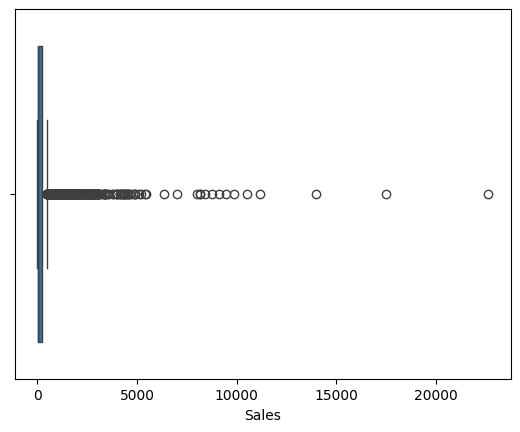

In [10]:
# Melihat persebaran data outlier dikolom Sales

df_saas_sales_boxplot = sns.boxplot(
    data = df_saas_sales['Sales'],
    orient = 'y'
)
plt.show(df_saas_sales_boxplot)

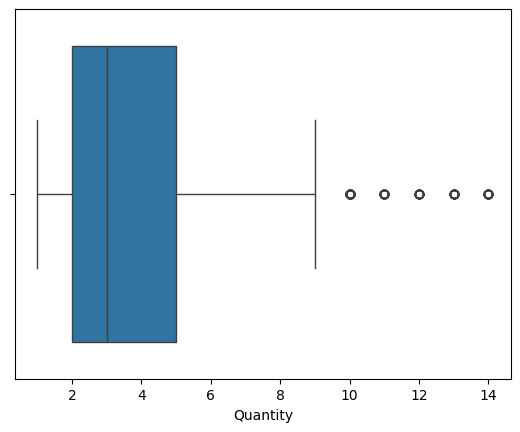

In [11]:
# Melihat persebaran data outlier dikolom Quantity

df_saas_quantity_boxplot = sns.boxplot(
    data = df_saas_sales['Quantity'],
    orient = 'y'
)
plt.show(df_saas_quantity_boxplot)


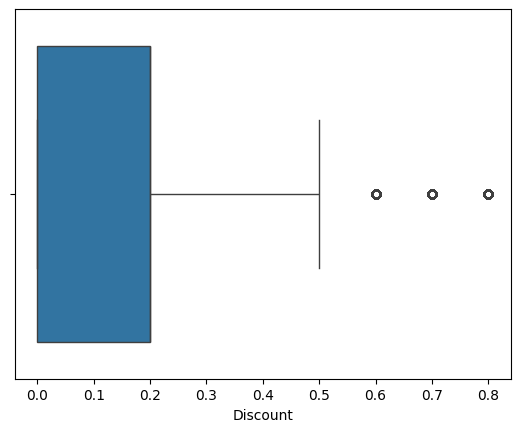

In [12]:
# Melihat persebaran data outlier dikolom Discount

df_saas_Discount_boxplot = sns.boxplot(
    data = df_saas_sales['Discount'],
    orient = 'y'
)
plt.show(df_saas_Discount_boxplot)

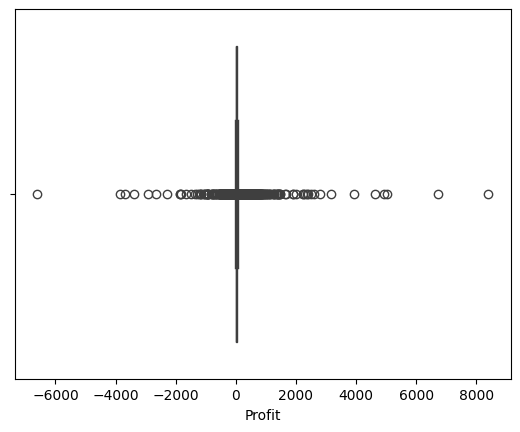

In [13]:
# Melihat persebaran data outlier dikolom Profit

df_saas_profit_boxplot = sns.boxplot(
    data = df_saas_sales['Profit'],
    orient = 'y'
)
plt.show(df_saas_profit_boxplot)

Data df_saas_sales: Cek apakah setiap kolom numerik (Sales, Quantity, Discount, Profit) berdistribusi normal, Ada beberapa cara untuk mengetahui distribusi normal:
* Visualisasi Diagram (eg. Q-Q Plot)
* Uji Frequentist (eg. Kolmogorov Smirnov, Shapiro Wilk, D'Agostino and Pearson)

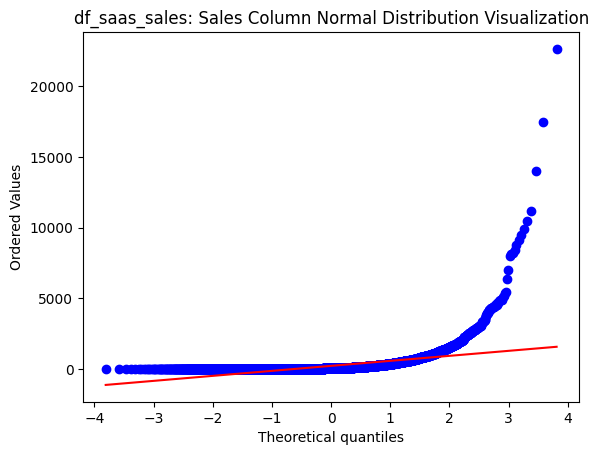

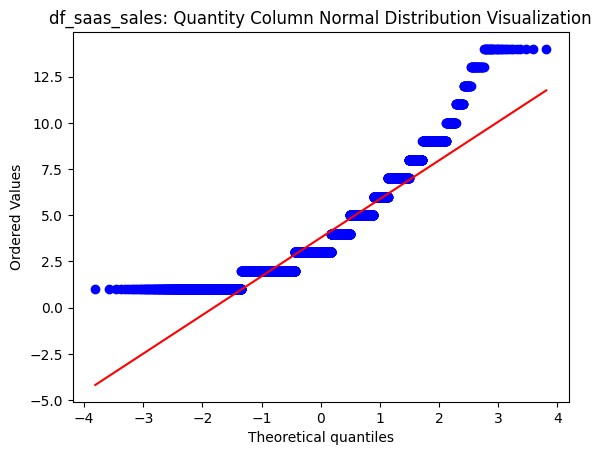

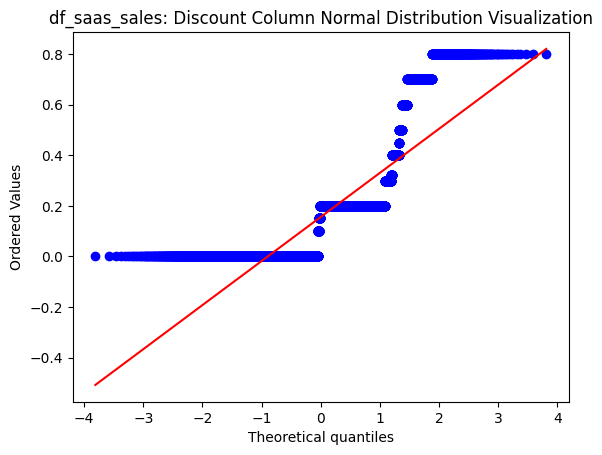

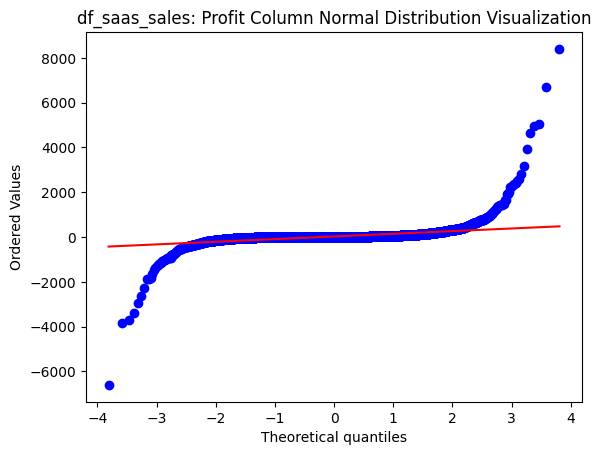

In [15]:
# Uji Distribusi Normal dengan Q-Q Plot

# Kolom Sales
sales_normal_distribution_qqplot = stats.probplot(df_saas_sales['Sales'], dist = 'norm', plot = plt)
plt.title('df_saas_sales: Sales Column Normal Distribution Visualization')
plt.show(sales_normal_distribution_qqplot)

# Kolom Quantity
quantity_normal_distribution_qqplot = stats.probplot(df_saas_sales['Quantity'], dist = 'norm', plot = plt)
plt.title('df_saas_sales: Quantity Column Normal Distribution Visualization')
plt.show(quantity_normal_distribution_qqplot)

# Kolom Discount
discount_normal_distribution_qqplot = stats.probplot(df_saas_sales['Discount'], dist = 'norm', plot = plt)
plt.title('df_saas_sales: Discount Column Normal Distribution Visualization')
plt.show(discount_normal_distribution_qqplot)

# Kolom Profit
profit_normal_distribution_qqplot = stats.probplot(df_saas_sales['Profit'], dist = 'norm', plot = plt)
plt.title('df_saas_sales: Profit Column Normal Distribution Visualization')
plt.show(profit_normal_distribution_qqplot)

df_saas_sales: Uji Distribusi Normal dengan Uji Frequentist

In [18]:
# Kolom Sales

# Menggunakan Kolmogrov Smirnov
statistic, kstestpvalue = kstest(df_saas_sales['Sales'], 'norm')
print(f'Kolmogorov Smirnov Test Result: {'Data tidak terdistribusi Normal' if kstestpvalue < 0.05 else 'Data terdistribusi Normal'}')

# Menggunakan D'Agostino and Pearson
statistic, pearsonpvalue = normaltest(df_saas_sales['Sales'])
print(f'Pearson Test Result: {'Data tidak terdistribusi Normal' if kstestpvalue < 0.05 else 'Data terdistribusi Normal'}')

SyntaxError: f-string: expecting '}' (<ipython-input-18-184da34f45c2>, line 5)

In [19]:
# Kolom Quantity

# Menggunakan Kolmogrov Smirnov
statistic, kstestpvalue = kstest(df_saas_sales['Quantity'], 'norm')
print(f'Kolmogorov Smirnov Test Result: {'Data tidak terdistribusi Normal' if kstestpvalue < 0.05 else 'Data terdistribusi Normal'}')

# Menggunakan D'Agostino and Pearson
statistic, pearsonpvalue = normaltest(df_saas_sales['Quantity'])
print(f'Pearson Test Result: {'Data tidak terdistribusi Normal' if kstestpvalue < 0.05 else 'Data terdistribusi Normal'}')

SyntaxError: f-string: expecting '}' (<ipython-input-19-8d1df2e6fc1d>, line 5)

In [ ]:
# Kolom Discount

# Menggunakan Kolmogrov Smirnov
statistic, kstestpvalue = kstest(df_saas_sales['Discount'], 'norm')
print(f'Kolmogorov Smirnov Test Result: {'Data tidak terdistribusi Normal' if kstestpvalue < 0.05 else 'Data terdistribusi Normal'}')


# Menggunakan D'Agostino and Pearson
statistic, pearsonpvalue = normaltest(df_saas_sales['Discount'])
print(f'Pearson Test Result: {'Data tidak terdistribusi Normal' if kstestpvalue < 0.05 else 'Data terdistribusi Normal'}')

Kolmogorov Smirnov Test Result: Data tidak terdistribusi Normal
Pearson Test Result: Data tidak terdistribusi Normal


In [ ]:
# Kolom Profit

# Menggunakan Kolmogrov Smirnov
statistic, kstestpvalue = kstest(df_saas_sales['Profit'], 'norm')
print(f'Kolmogorov Smirnov Test Result: {'Data tidak terdistribusi Normal' if kstestpvalue < 0.05 else 'Data terdistribusi Normal'}')

# Menggunakan D'Agostino and Pearson
statistic, pearsonpvalue = normaltest(df_saas_sales['Profit'])
print(f'Pearson Test Result: {'Data tidak terdistribusi Normal' if kstestpvalue < 0.05 else 'Data terdistribusi Normal'}')

Kolmogorov Smirnov Test Result: Data tidak terdistribusi Normal
Pearson Test Result: Data tidak terdistribusi Normal


Setelah melakukan uji distribusi normal untuk semua kolom numerik (Sales, Quantity, Discount, Profit) tidak ada yang berdistribusi normal

Selanjutnya, kita bisa melakukan uji korelasi antar kolom numerik menggunakan method spearman

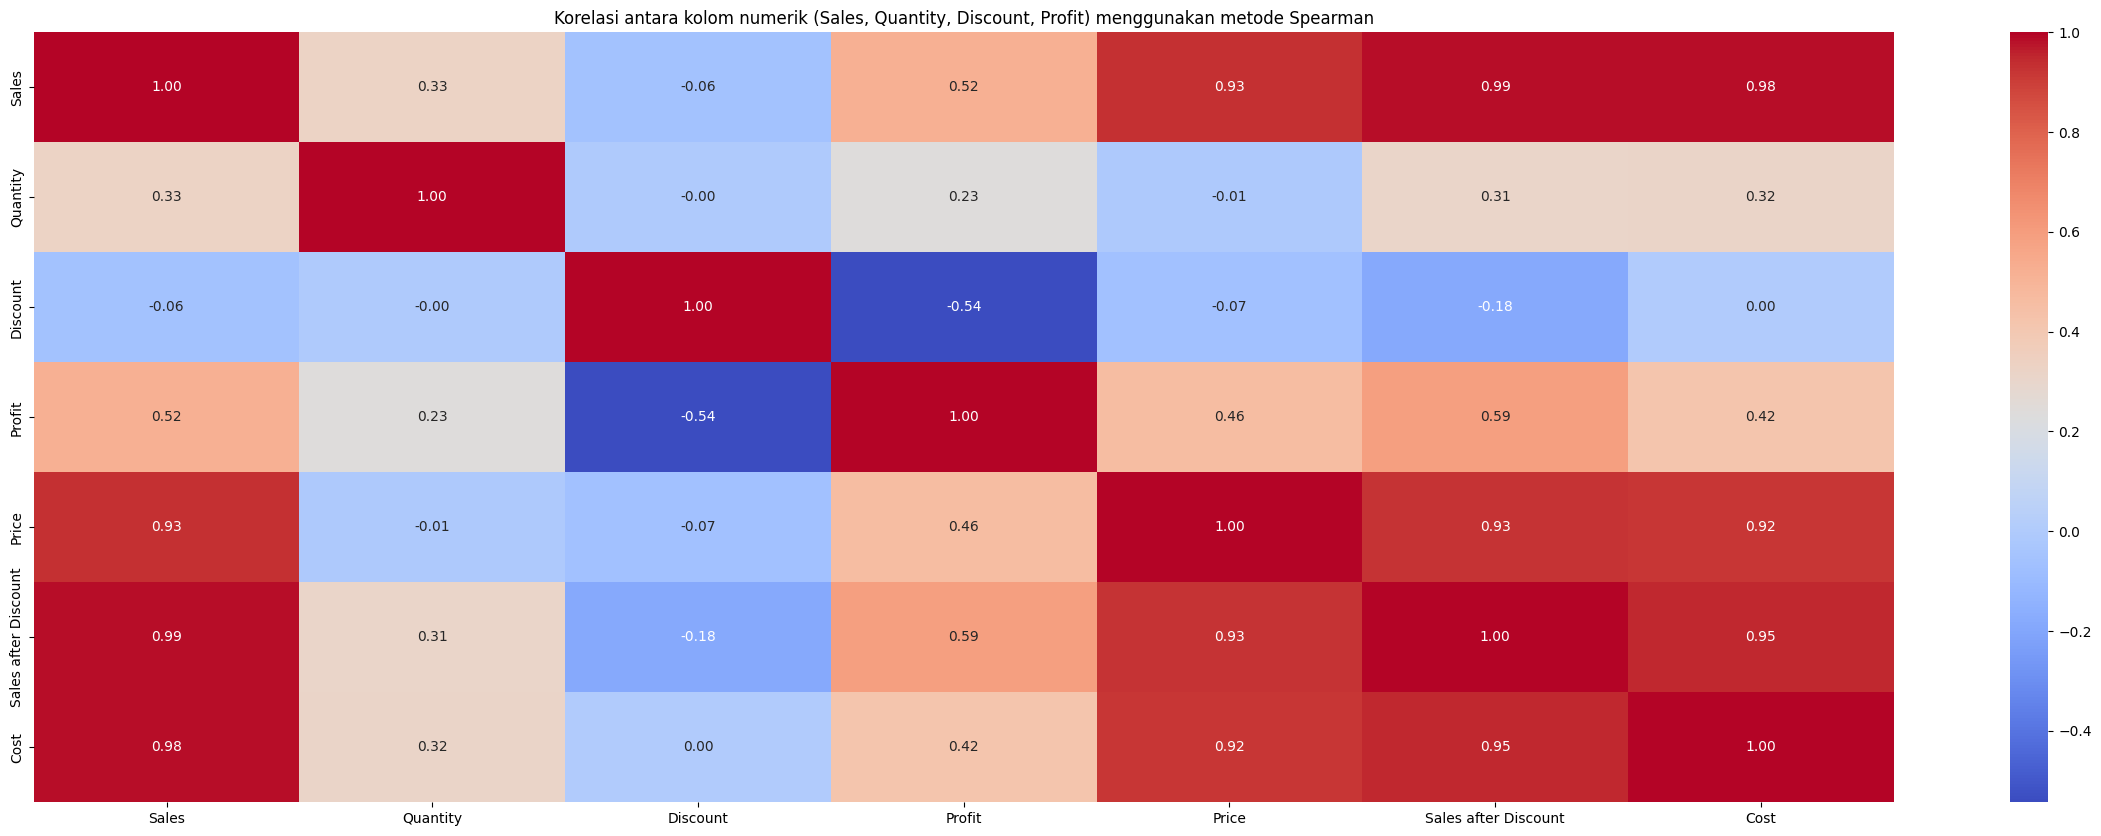

In [20]:
spearman_corr = df_saas_sales[['Sales', 'Quantity', 'Discount', 'Profit', 'Price', 'Sales after Discount', 'Cost']].corr(method='spearman')

plt.figure(figsize=(30, 10))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi antara kolom numerik (Sales, Quantity, Discount, Profit) menggunakan metode Spearman')
plt.show()

Visualisasi untuk melihat Produk dengan Penjualan (Sales) terbanyak ke paling sedikit

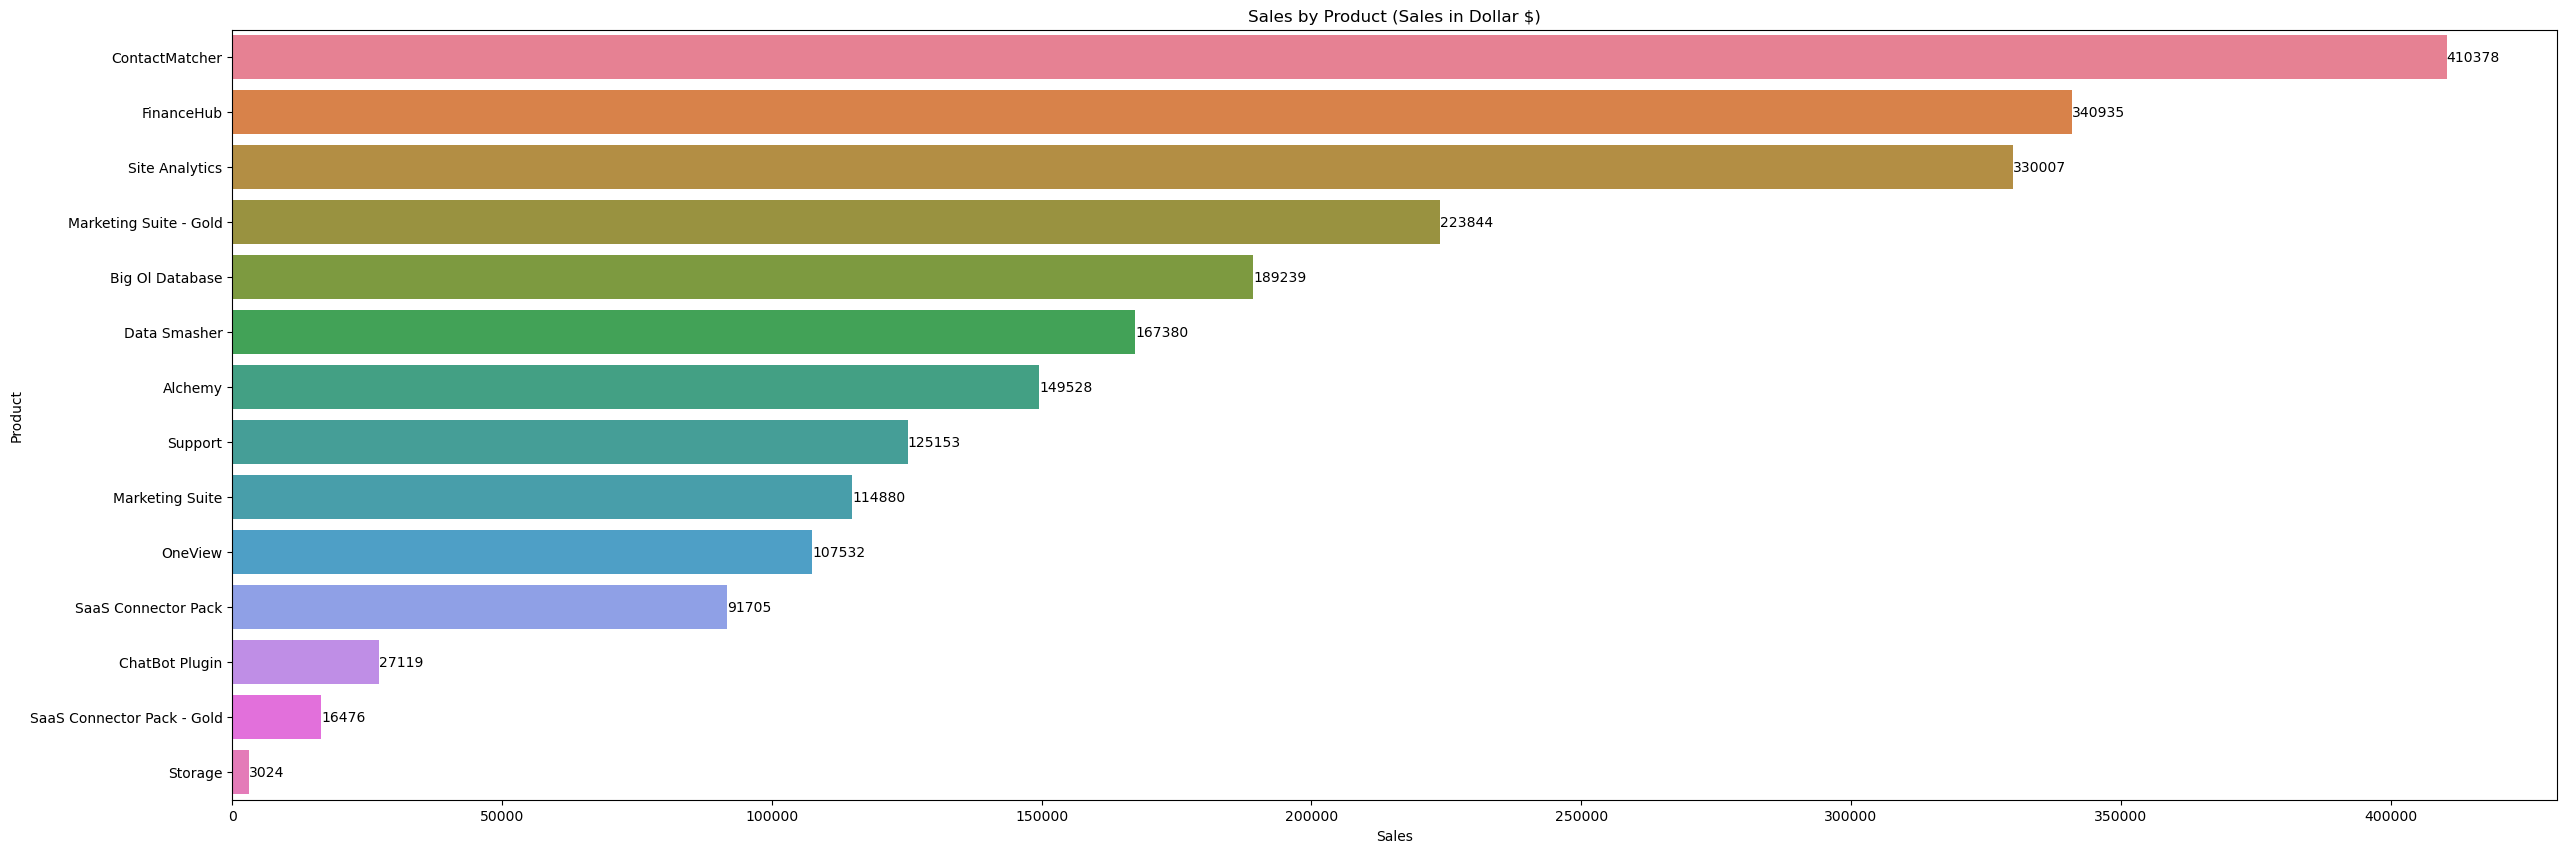

In [ ]:
plt.figure(figsize=(30, 10))
sales_by_product = df_saas_sales.groupby('Product')['Sales'].sum().sort_values(ascending = False).reset_index()
sales_by_product_barplot = sns.barplot(
    data = sales_by_product,
    x = 'Sales',
    y = 'Product',
    hue = 'Product'
)
for container in sales_by_product_barplot.containers:
    sales_by_product_barplot.bar_label(container, fmt='%.0f')
plt.title('Sales by Product (Sales in Dollar $)')
plt.show()

Visualisasi untuk melihat Produk dengan Profit terbanyak ke paling sedikit

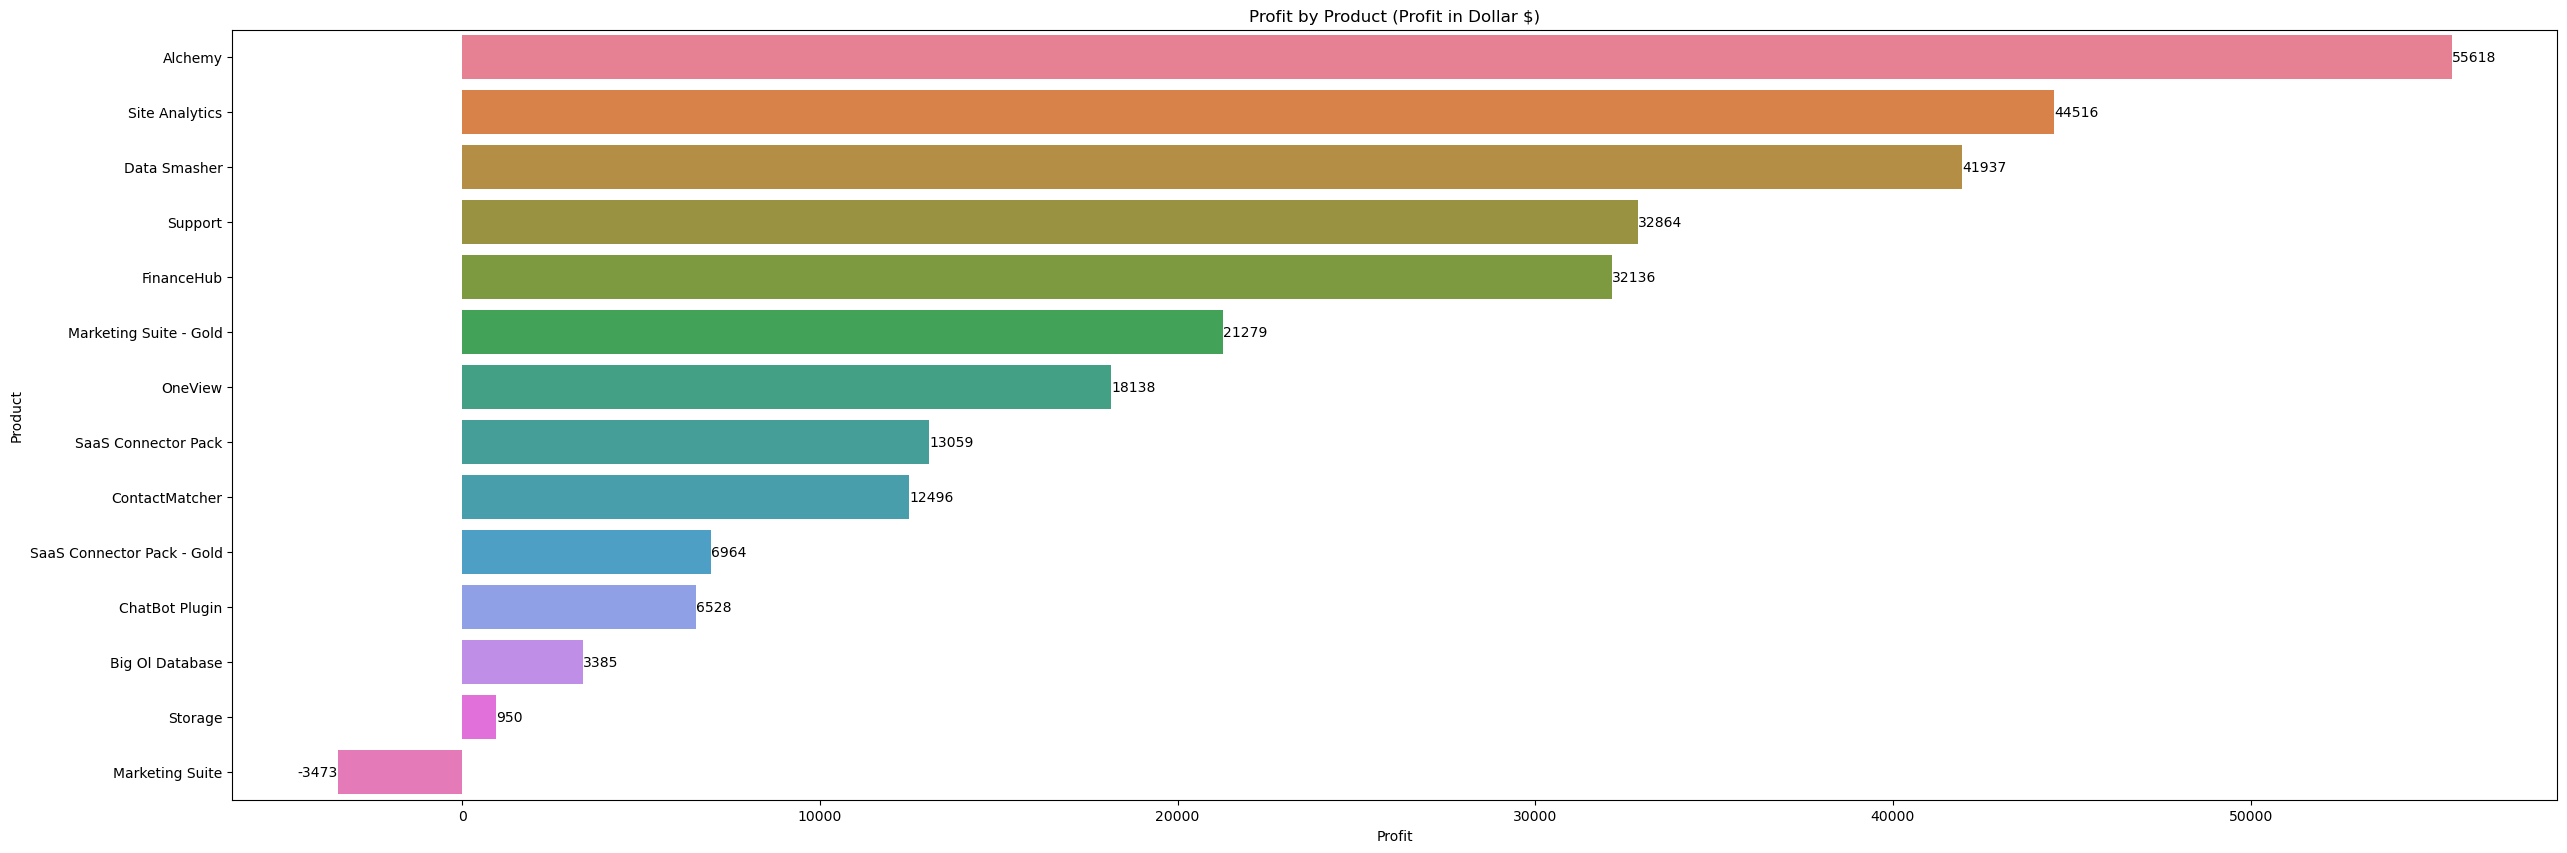

In [ ]:
plt.figure(figsize=(30, 10))
profit_by_product = df_saas_sales.groupby('Product')['Profit'].sum().sort_values(ascending = False).reset_index()
profit_by_product_barplot = sns.barplot(
    data = profit_by_product,
    x = 'Profit',
    y = 'Product',
    hue = 'Product'
)
for container in profit_by_product_barplot.containers:
    profit_by_product_barplot.bar_label(container, fmt='%.0f')
plt.title('Profit by Product (Profit in Dollar $)')
plt.show()

Visualisasi untuk melihat produk (Product) dengan Profit Margin (dalam %) dari tertinggi ke paling rendah

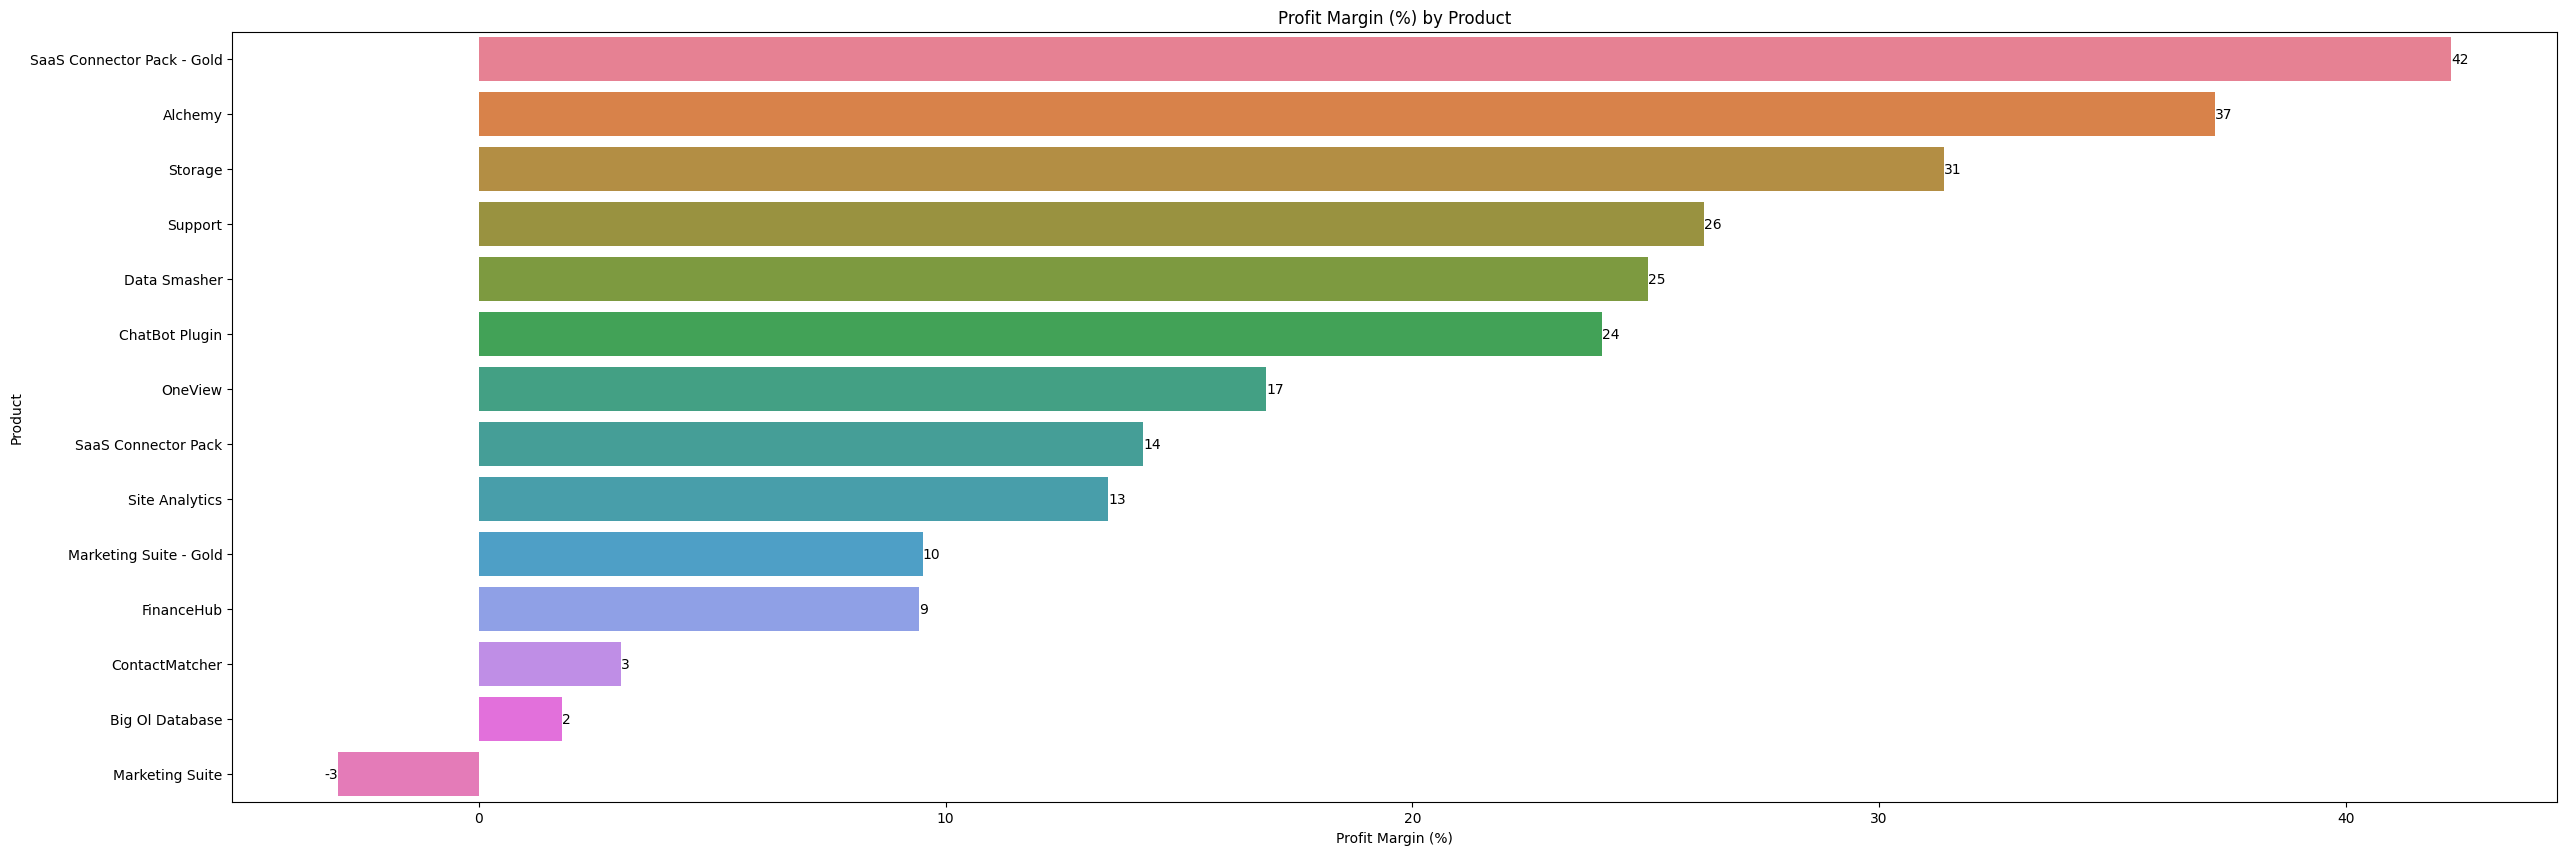

In [21]:
plt.figure(figsize=(30, 10))

profit_margin_by_product = df_saas_sales.groupby('Product').agg({
    'Sales': 'sum',
    'Profit': 'sum'
}).reset_index()

profit_margin_by_product['Profit Margin (%)'] = (profit_margin_by_product['Profit'] / profit_margin_by_product['Sales']) * 100

profit_margin_by_product_barplot = sns.barplot(
    data = profit_margin_by_product.sort_values(by = 'Profit Margin (%)', ascending = False),
    x = 'Profit Margin (%)',
    y = 'Product',
    hue = 'Product'
)
for container in profit_margin_by_product_barplot.containers:
    profit_margin_by_product_barplot.bar_label(container, fmt='%.0f')
plt.title('Profit Margin (%) by Product')
plt.show()

Visualisasi untuk melihat negara (Country) dengan Profit Margin (dalam %) dari tertinggi ke paling rendah

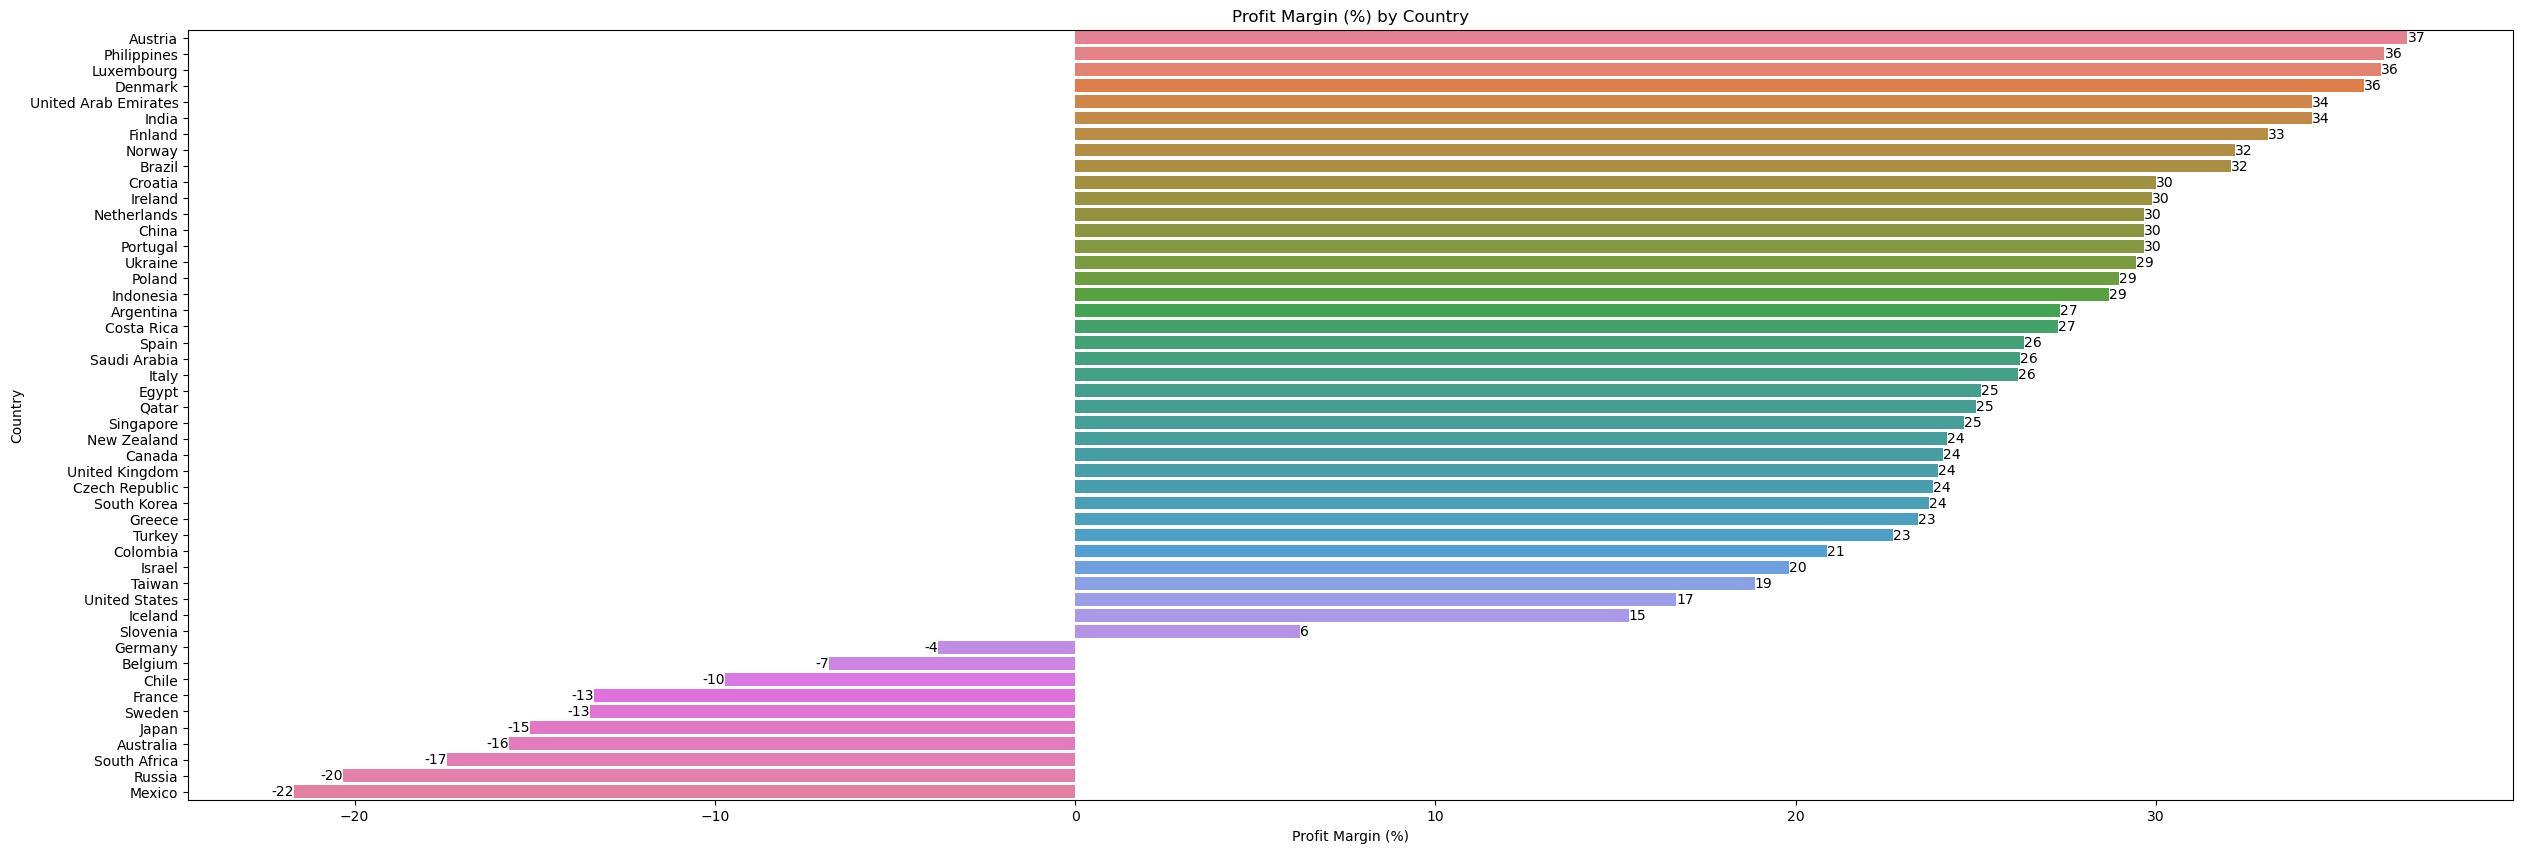

In [ ]:
plt.figure(figsize=(30, 10))

profit_margin_by_country = df_saas_sales.groupby('Country').agg({
    'Sales': 'sum',
    'Profit': 'sum'
}).reset_index()

profit_margin_by_country['Profit Margin (%)'] = (profit_margin_by_country['Profit'] / profit_margin_by_country['Sales']) * 100

profit_margin_by_country_barplot = sns.barplot(
    data = profit_margin_by_country.sort_values(by = 'Profit Margin (%)', ascending = False),
    x = 'Profit Margin (%)',
    y = 'Country',
    hue = 'Country'
)
for container in profit_margin_by_country_barplot.containers:
    profit_margin_by_country_barplot.bar_label(container, fmt='%.0f')
plt.title('Profit Margin (%) by Country')
plt.show()

Visualisasi Penjualan (Sales) berdasarkan Negara (Country) dengan Penjualan terbanyak ke paling sedikit

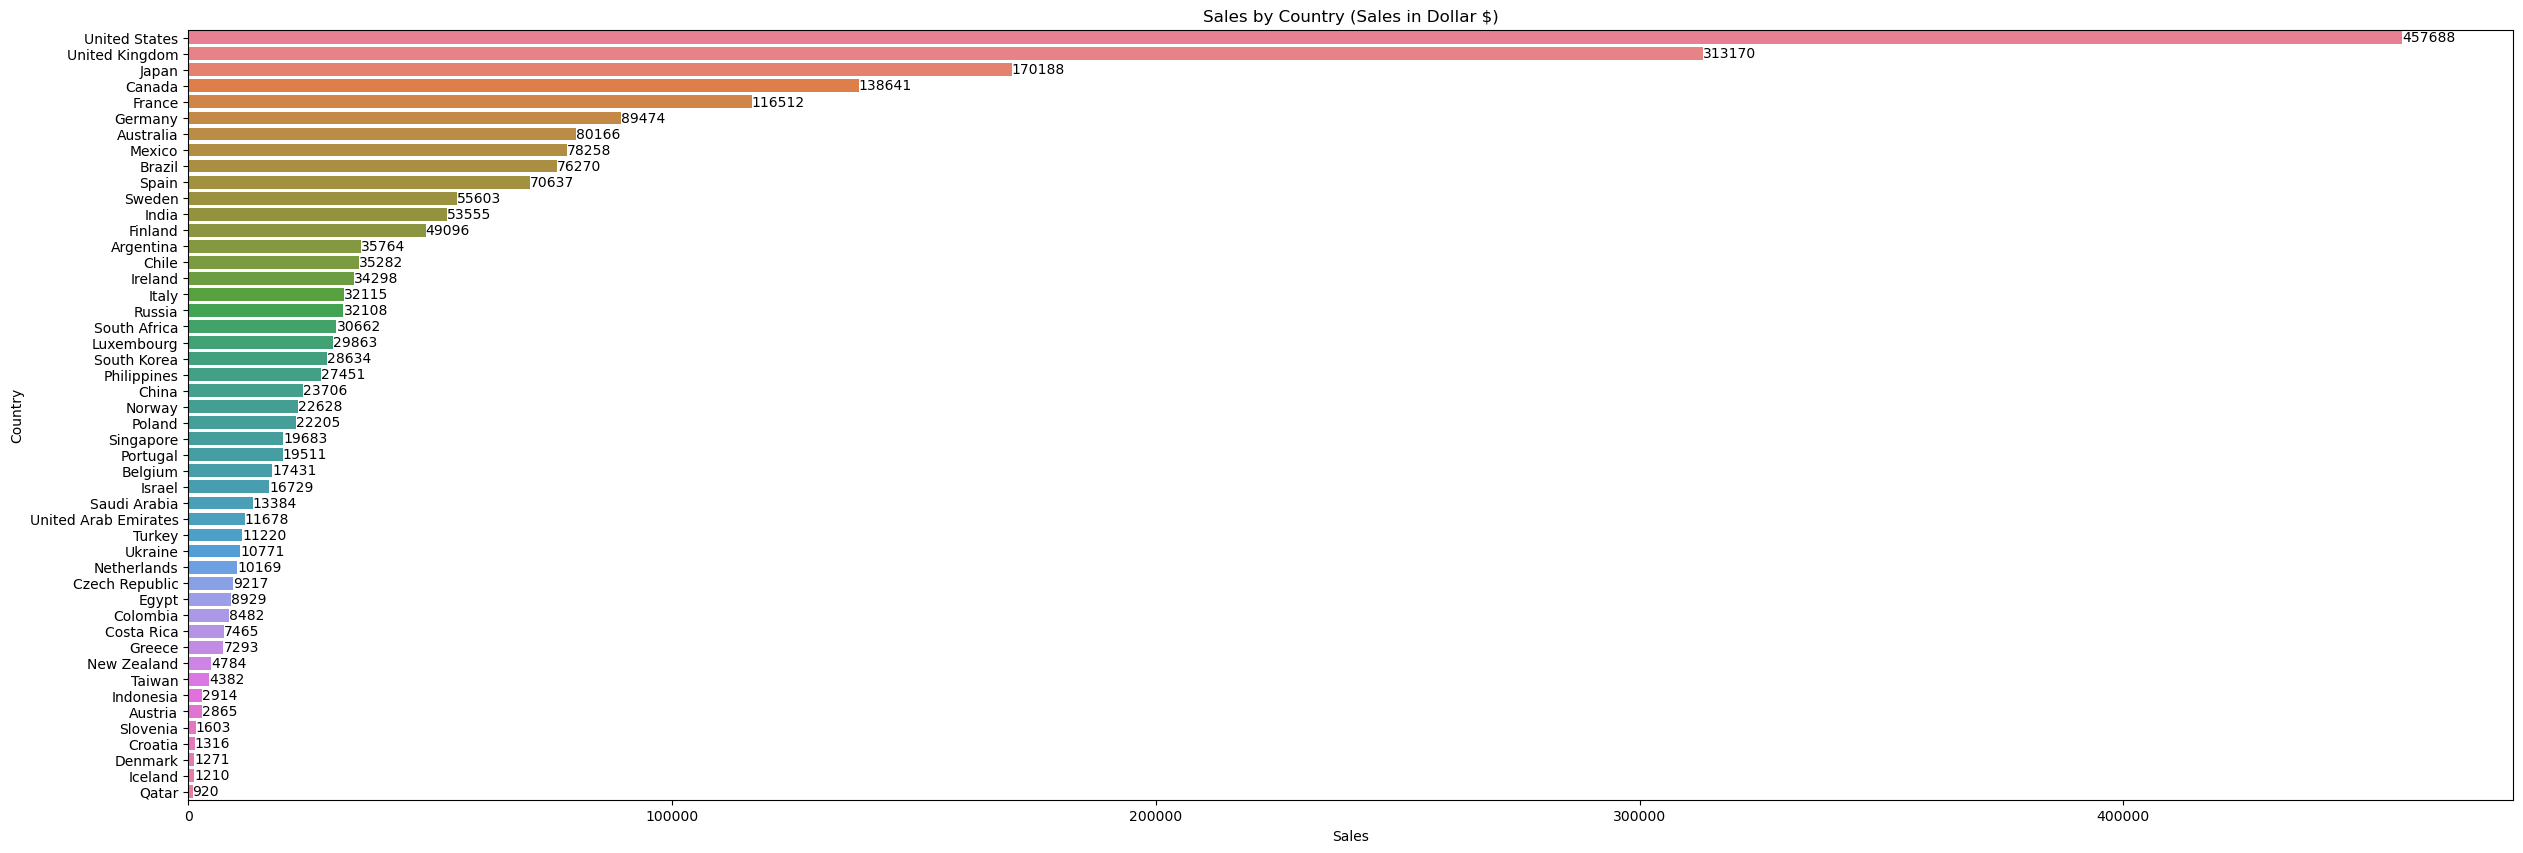

In [ ]:
plt.figure(figsize=(30, 10))
sales_by_country = df_saas_sales.groupby('Country')['Sales'].sum().sort_values(ascending = False).reset_index()
sales_by_country_barplot = sns.barplot(
    data = sales_by_country,
    x = 'Sales',
    y = 'Country',
    hue = 'Country'
)
for container in sales_by_country_barplot.containers:
    sales_by_country_barplot.bar_label(container, fmt='%.0f')
plt.title('Sales by Country (Sales in Dollar $)')
plt.show()

Visualisasi Profit berdasarkan Negara (Country) dengan Penjualan terbanyak ke paling sedikit

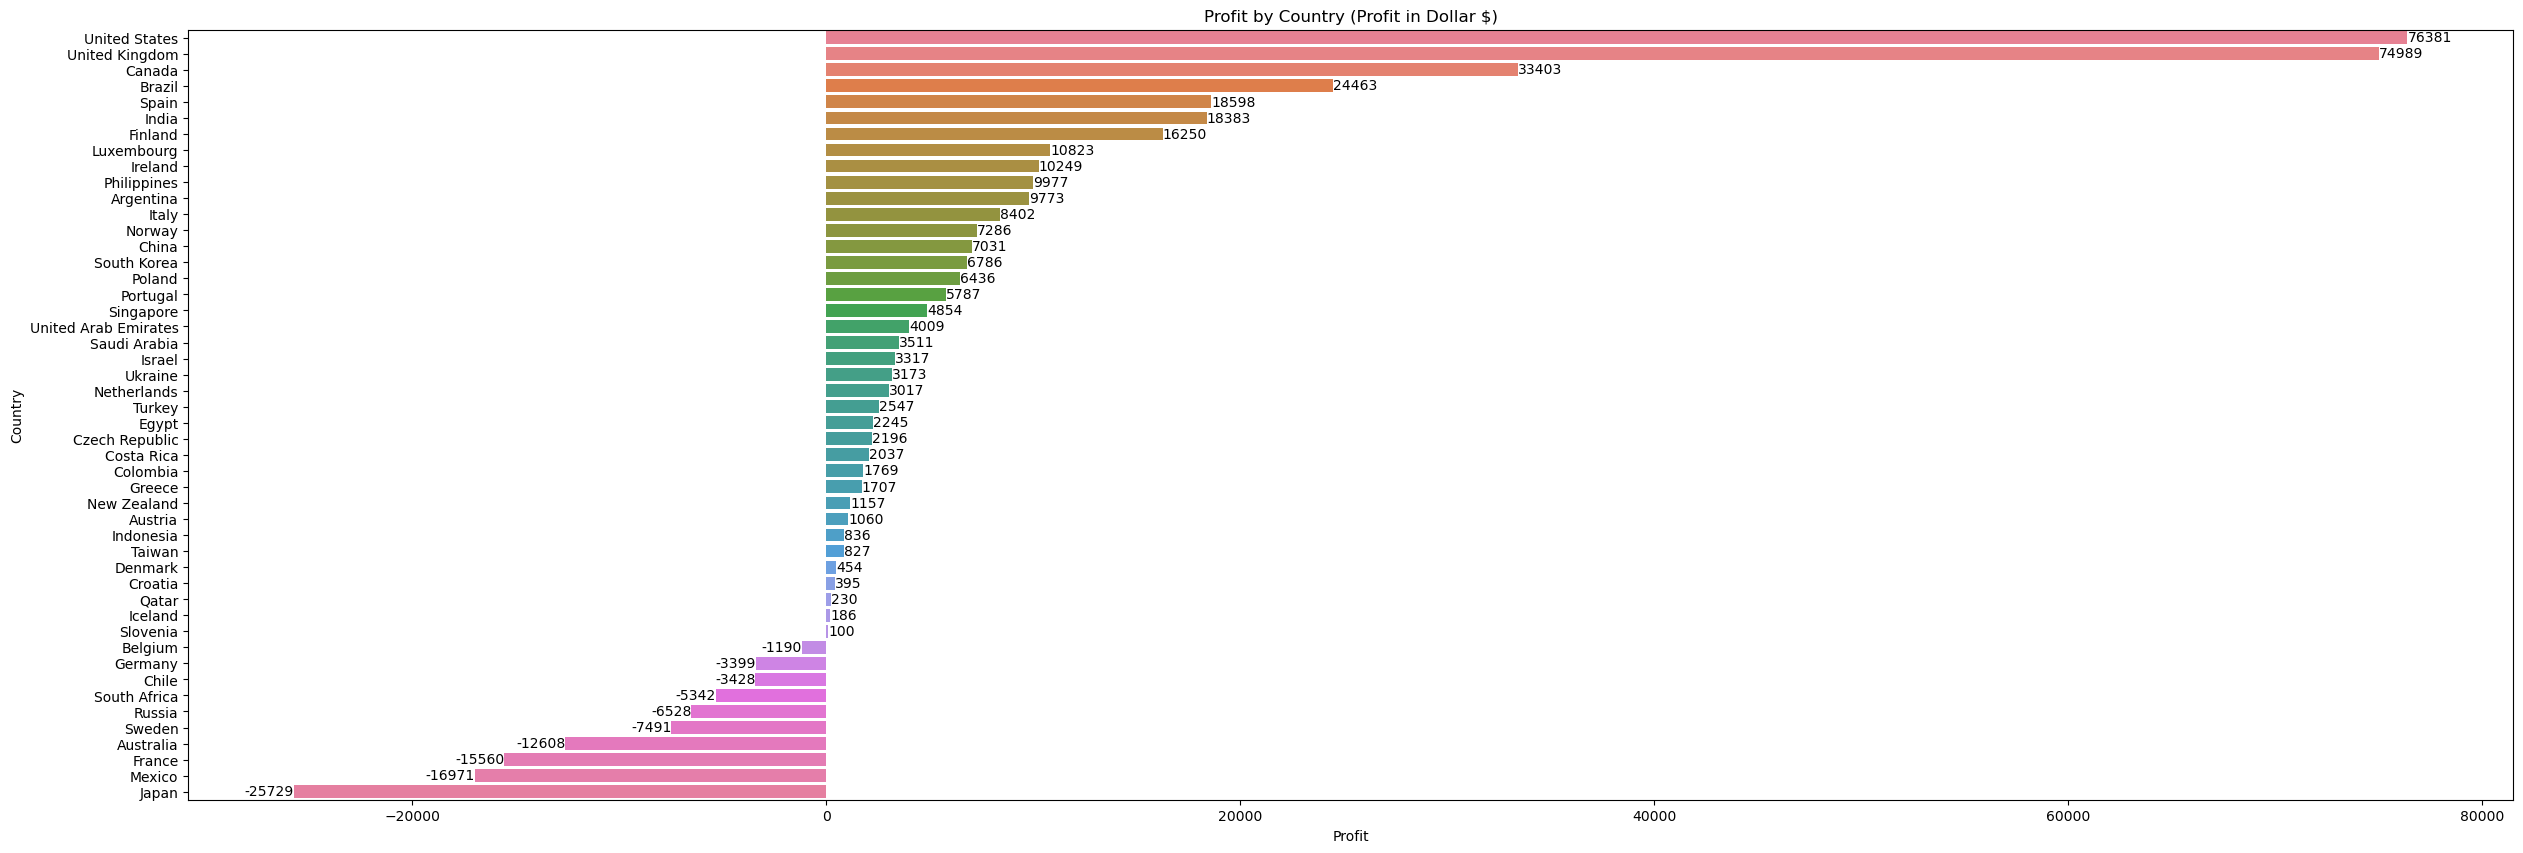

In [ ]:
plt.figure(figsize=(30, 10))
sales_by_country = df_saas_sales.groupby('Country')['Profit'].sum().sort_values(ascending = False).reset_index()
sales_by_country_barplot = sns.barplot(
    data = sales_by_country,
    x = 'Profit',
    y = 'Country',
    hue = 'Country'
)
for container in sales_by_country_barplot.containers:
    sales_by_country_barplot.bar_label(container, fmt='%.0f')
plt.title('Profit by Country (Profit in Dollar $)')
plt.show()

Visualisasi jumlah kuantitas (Quantity) untuk setiap Product

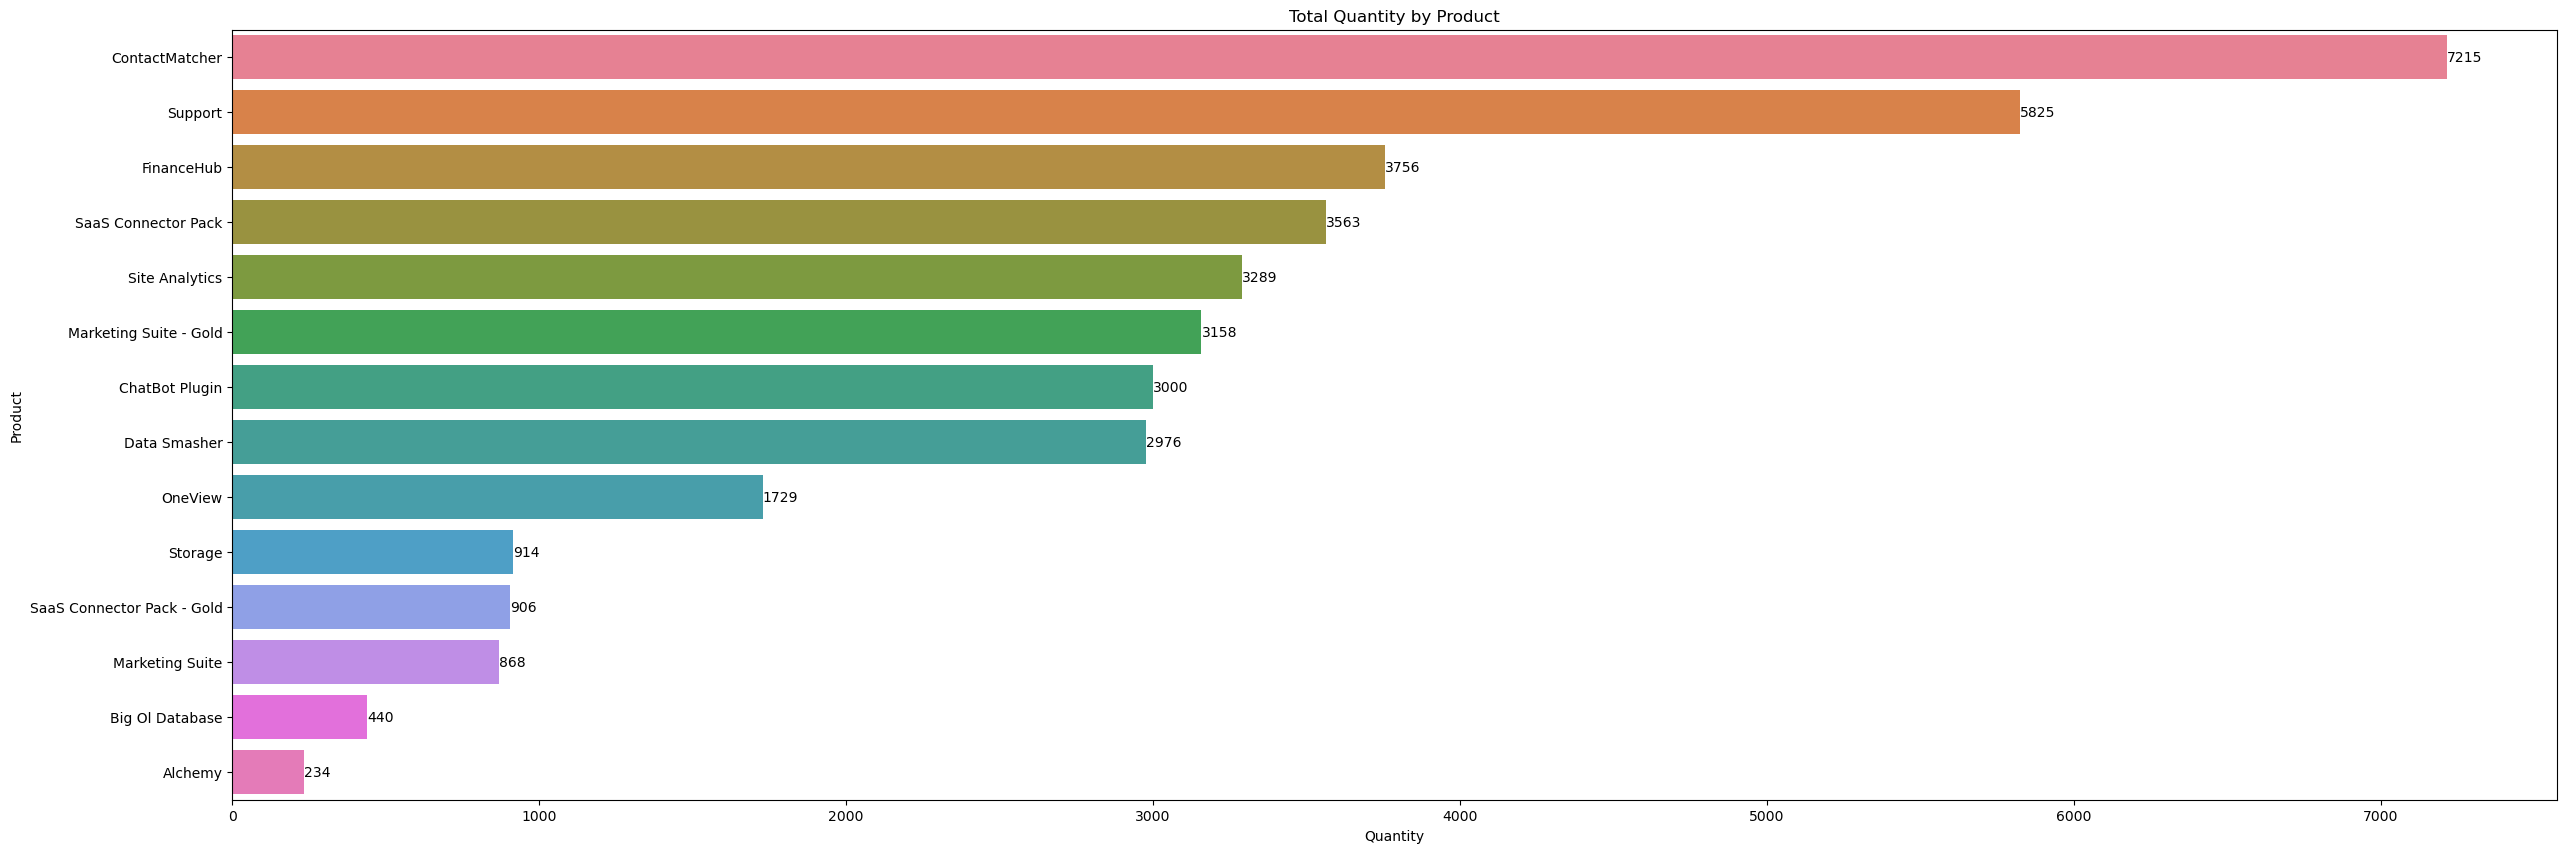

In [ ]:
plt.figure(figsize=(30, 10))
total_quantity_by_product = df_saas_sales.groupby('Product')['Quantity'].sum().sort_values(ascending = False).reset_index()
total_quantity_by_product_barplot = sns.barplot(
    data = total_quantity_by_product,
    x = 'Quantity',
    y = 'Product',
    hue = 'Product'
)
for container in total_quantity_by_product_barplot.containers:
    total_quantity_by_product_barplot.bar_label(container, fmt='%.0f')
plt.title('Total Quantity by Product')
plt.show()

Visualisasi Total Penjualan (Sales) dan Total Keuntungan (Profit) by Product

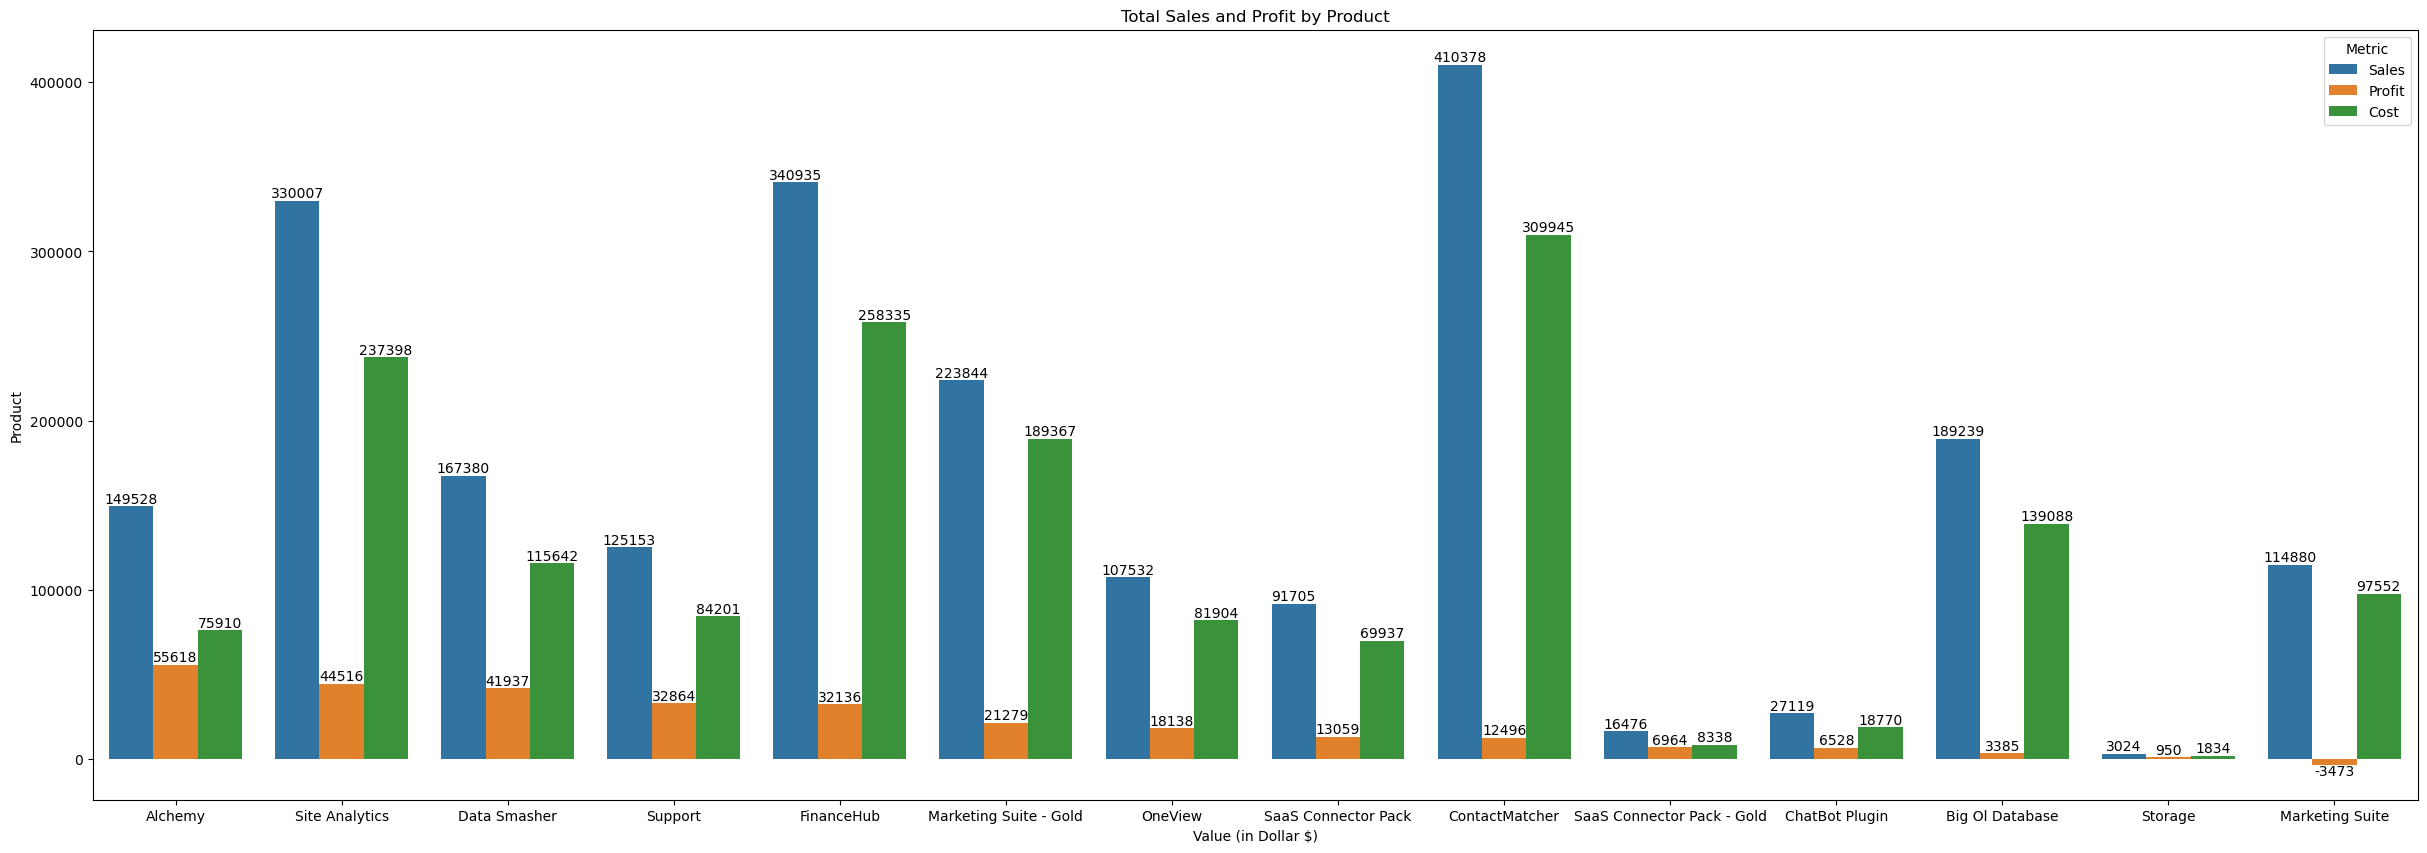

In [ ]:
# Mengelompokkan data berdasarkan produk dan menghitung total sales dan total profit untuk setiap produk
product_sales_profit = df_saas_sales.groupby('Product').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Cost': 'sum'
}).sort_values(by = 'Profit', ascending = False).reset_index()

# Membuat visualisasi barplot untuk total sales dan total profit setiap produk
plt.figure(figsize=(30, 10))
product_sales_profit_barplot = sns.barplot(
    data=product_sales_profit.melt(id_vars='Product', value_vars=['Sales', 'Profit', 'Cost']),
    x='Product',
    y='value',
    hue='variable'
)

for container in product_sales_profit_barplot.containers:
    product_sales_profit_barplot.bar_label(container, fmt='%.0f')

plt.title('Total Sales and Profit by Product')
plt.xlabel('Value (in Dollar $)')
plt.ylabel('Product')
plt.legend(title='Metric')
plt.show()

Visualisasi Perbandingan antara Total Penjualan (Sales) dan Total Keuntungan (Profit)

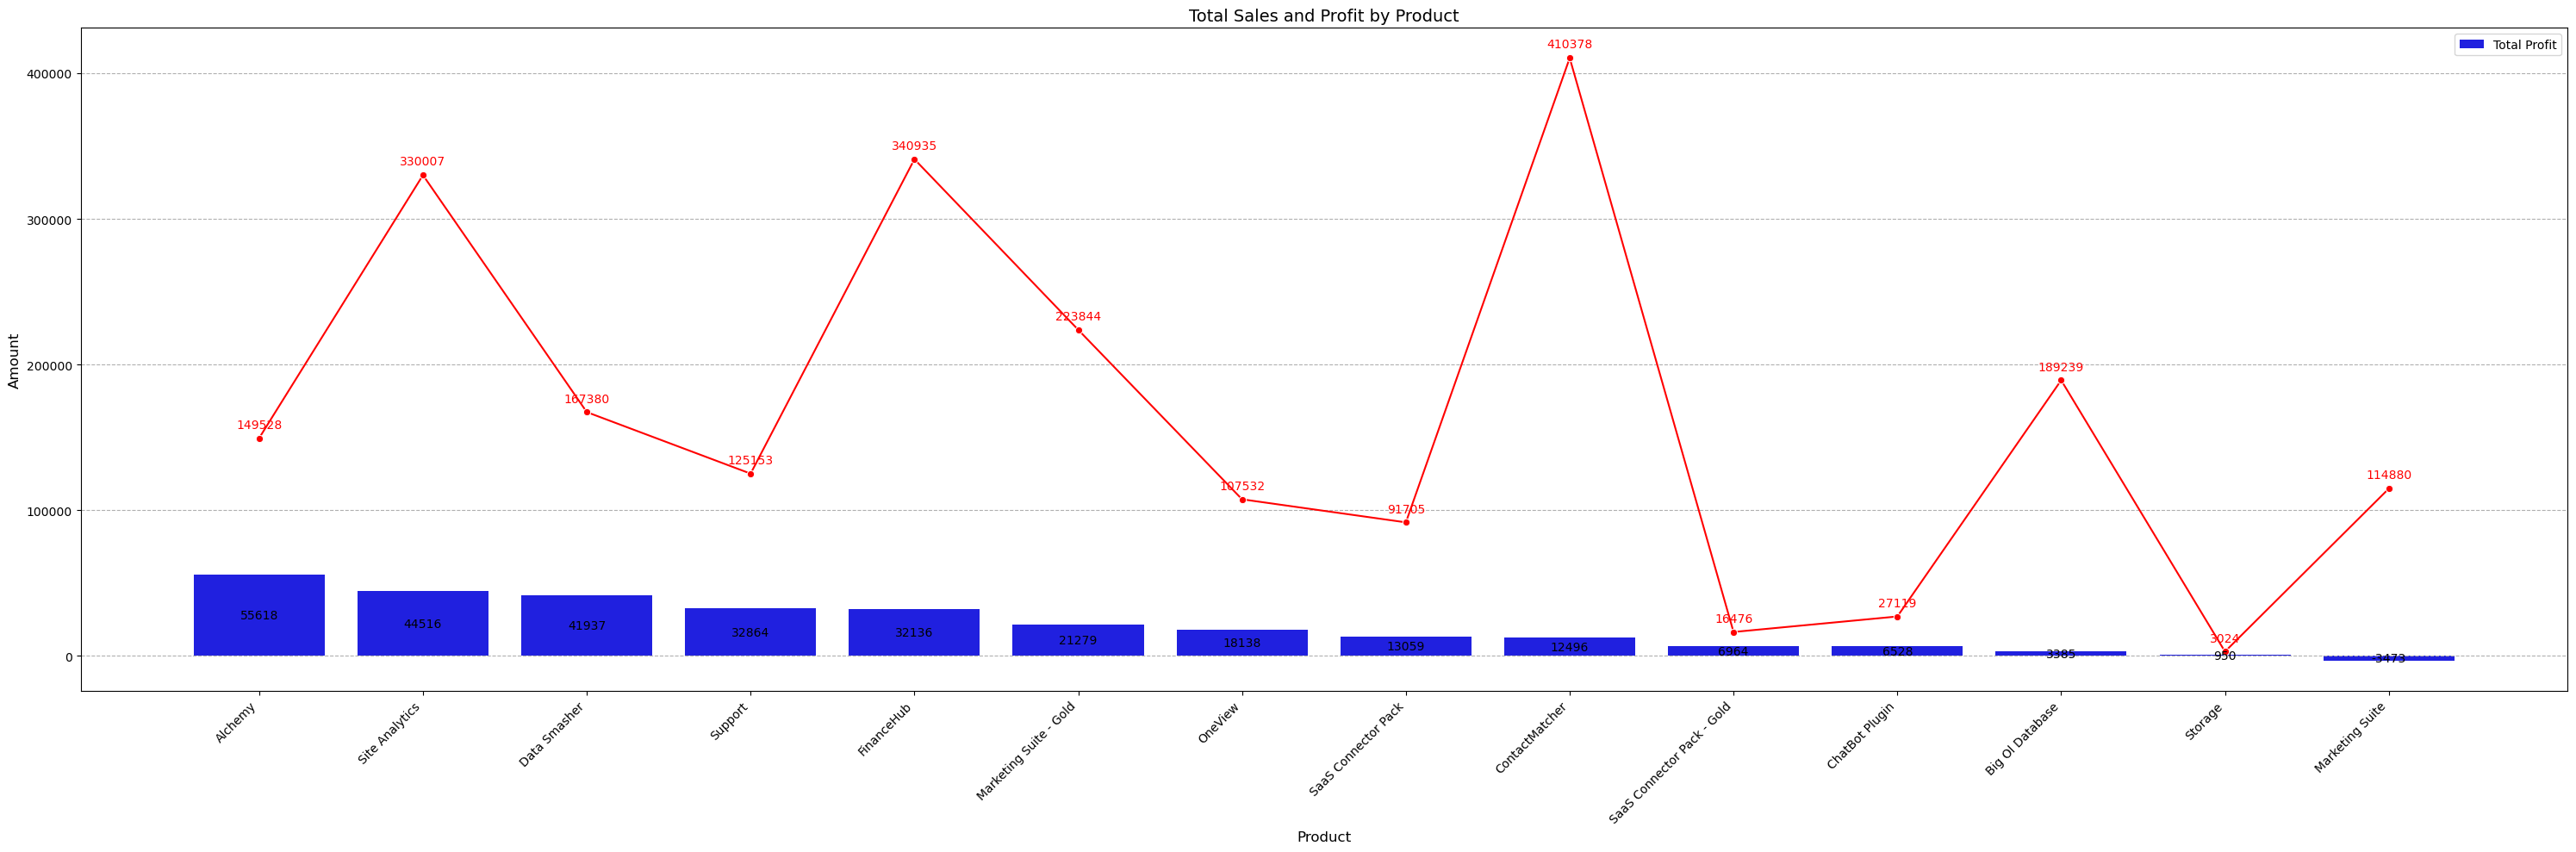

In [ ]:
plt.figure(figsize=(30, 10))
# Bar chart untuk Total Profit
profit_by_product_barplot_combine = sns.barplot(
    data = product_sales_profit,
    x = 'Product',
    y = 'Profit',
    color = 'blue',
    label = 'Total Profit'
)

# Line chart untuk Total Sales
sales_by_product_lineplot_combine = sns.lineplot(
    data = product_sales_profit,
    x = 'Product',
    y = 'Sales',
    color = 'red',
    marker = 'o',
)

for container in profit_by_product_barplot_combine.containers:
    profit_by_product_barplot_combine.bar_label(container, fmt = '%.0f', label_type = 'center', color = 'black')

for product, sales in zip(product_sales_profit['Product'], product_sales_profit['Sales']):
    plt.text(product, sales + 7000, f'{sales:.0f}', color='red', ha = 'center')

plt.title('Total Sales and Profit by Product', fontsize = 14)
plt.xlabel('Product', fontsize = 12)
plt.ylabel('Amount', fontsize = 12)
plt.xticks(rotation = 45, ha = 'right')

plt.grid(axis = 'y', linestyle = '--', alpha = 1)
plt.tight_layout()

plt.show()

Visualisasi Impact Discount terhadap Profit dan Sales

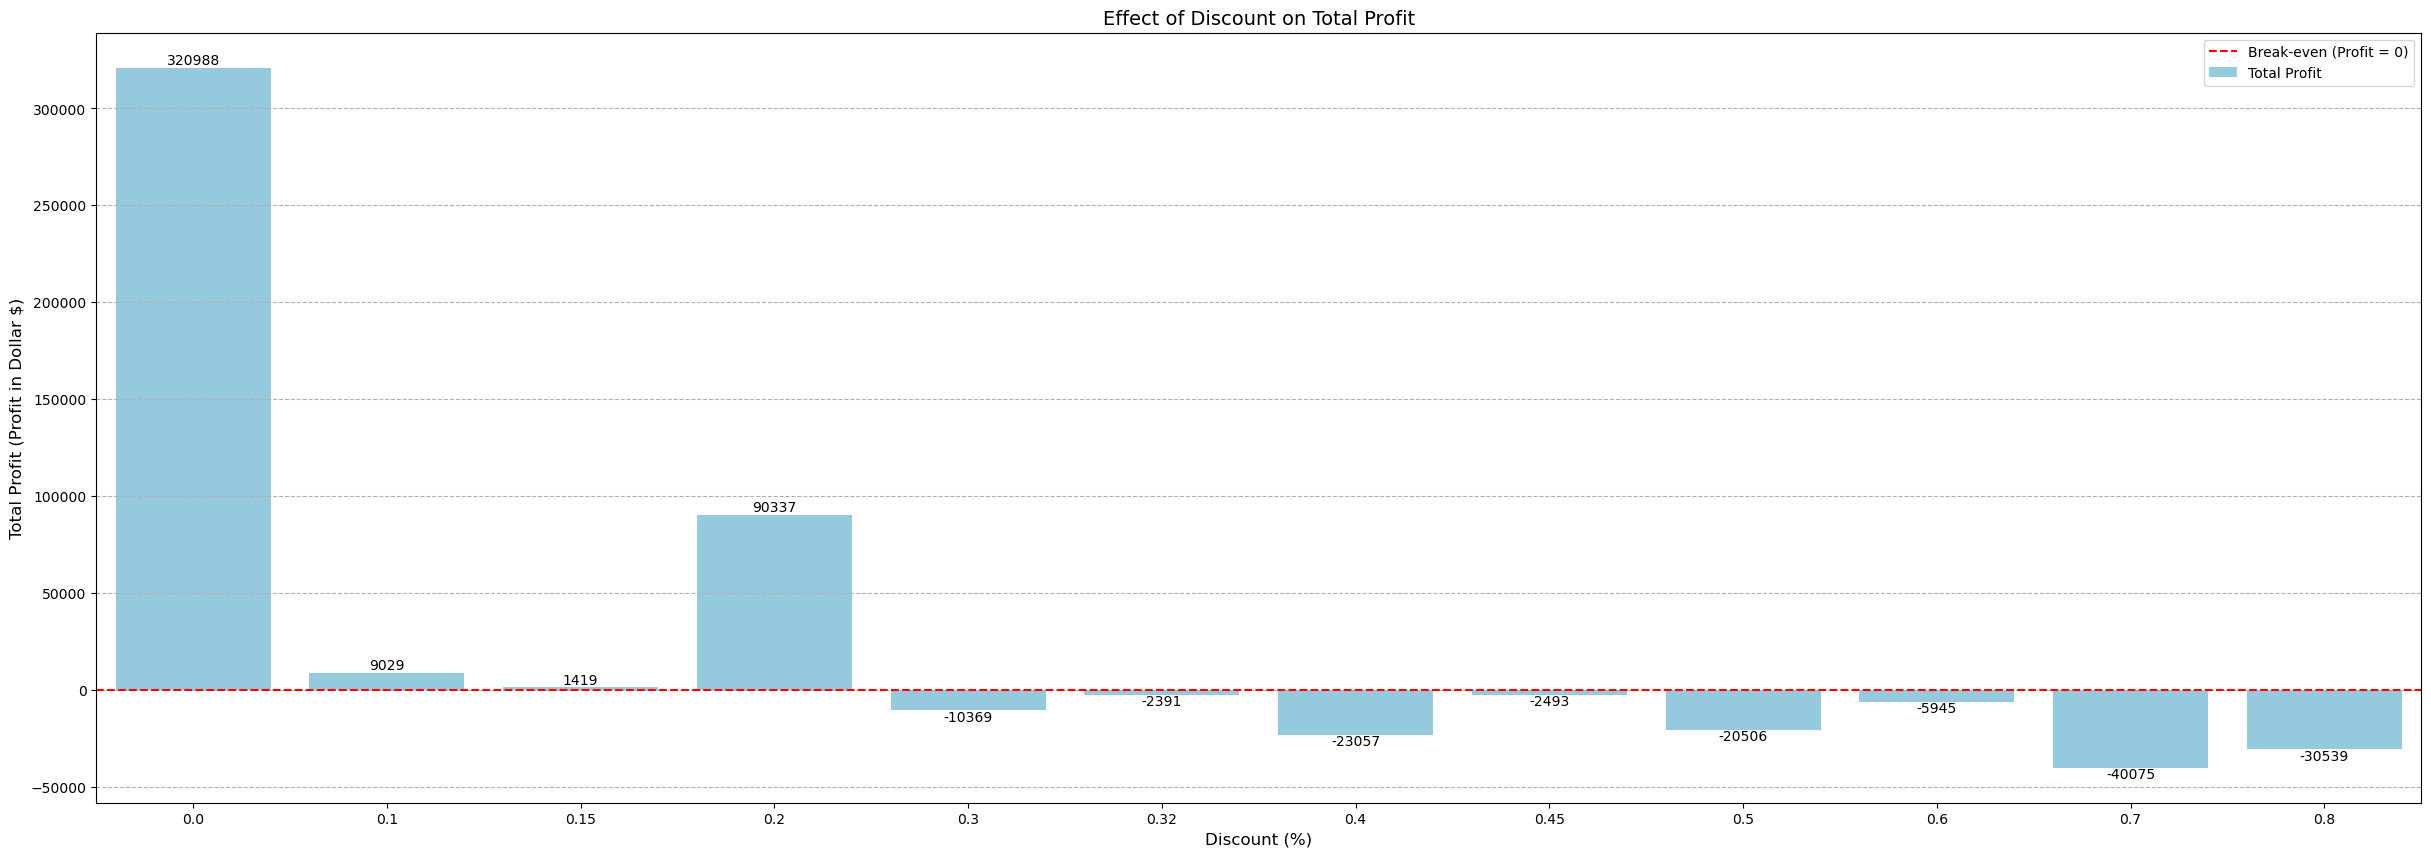

In [ ]:
discount_profit_sum_analysis = df_saas_sales.groupby('Discount')['Profit'].sum().reset_index()

plt.figure(figsize=(30, 10))
discount_impact_on_profit_barplot = sns.barplot(
    data = discount_profit_sum_analysis,
    x = 'Discount',
    y = 'Profit',
    color = 'skyblue',
    label = 'Total Profit'
)

for container in discount_impact_on_profit_barplot.containers:
    discount_impact_on_profit_barplot.bar_label(container, fmt = '%.0f', color = 'black')

plt.axhline(0, color='red', linestyle='--', label='Break-even (Profit = 0)')
plt.title('Effect of Discount on Total Profit', fontsize=14)
plt.xlabel('Discount (%)', fontsize=12)
plt.ylabel('Total Profit (Profit in Dollar $)', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--')
plt.show()

Melakukan uji analisa menggunakan Kruskal-Wallis: Apakah ada perbedaan yang signifikan untuk penjualan (Sales) terhadap semua produk

Alasan menggunakan Kruskal-Wallis: Data tidak terdistribusi Normal, Kruskal-Wallis ini pengganti uji ANOVA

H0: Tidak ada perubahan signifikan dalam penjualan (Sales) antara produk

H1: Ada perubahan signifikan dalam penjualan (Sales) antara produk

In [ ]:
unique_product = df_saas_sales['Product'].unique()
sales_list_by_product = [df_saas_sales[df_saas_sales['Product'] == product]['Sales'] for product in unique_product]

# Melakukan uji Kruskal-Wallis
kruskal_stat, kruskal_p = kruskal(*sales_list_by_product)

# Menampilkan hasil uji Kruskal-Wallis
print("Kruskal-Wallis Test Results")
print(f"Statistic: {kruskal_stat}")
print(f"P-Value: {kruskal_p}")

# Interpretasi hasil
if kruskal_p < 0.05:
    print('\nAda perbedaan signifikan dalam penjualan (Sales) antara produk')
else:
    print('\nTidak ada perbedaan signifikan dalam penjualan (Sales) antara produk')

Kruskal-Wallis Test Results
Statistic: 2763.0537257623664
P-Value: 0.0

Ada perbedaan signifikan dalam penjualan (Sales) antara produk


Melakukan uji analisa menggunakan Kruskal-Wallis: Apakah ada perbedaan yang signifikan untuk keuntungan (Profit) terhadap produk

Alasan menggunakan Kruskal-Wallis: Data tidak terdistribusi Normal, Kruskal-Wallis ini pengganti uji ANOVA

H0: Tidak ada perubahan signifikan dalam keuntungan (Profit) antara produk

H1: Ada perubahan signifikan dalam keuntungan (Profit) antara produk

In [ ]:
unique_product = df_saas_sales['Product'].unique()
profit_list_by_product = [df_saas_sales[df_saas_sales['Product'] == product]['Profit'] for product in unique_product]

# Melakukan uji Kruskal-Wallis
kruskal_stat, kruskal_p = kruskal(*profit_list_by_product)

# Menampilkan hasil uji Kruskal-Wallis
print("Kruskal-Wallis Test Results")
print(f"Statistic: {kruskal_stat}")
print(f"P-Value: {kruskal_p}")

# Interpretasi hasil
if kruskal_p < 0.05:
    print('\nAda perbedaan signifikan dalam keuntungan (Profit) antara produk')
else:
    print('\nTidak ada perbedaan signifikan dalam keuntungan (Profit) antara produk')

Kruskal-Wallis Test Results
Statistic: 1086.9039328624303
P-Value: 3.7186575880021935e-224

Ada perbedaan signifikan dalam keuntungan (Profit) antara produk


Melakukan uji analisa menggunakan Kruskal-Wallis: Apakah ada perbedaan yang signifikan untuk penjualan (Sales) terhadap negara (Country)

Alasan menggunakan Kruskal-Wallis: Data tidak terdistribusi Normal, Kruskal-Wallis ini pengganti uji ANOVA

H0: Tidak ada perubahan signifikan dalam penjualan (Sales) antara negara (Country)

H1: Ada perubahan signifikan dalam penjualan (Sales) antara negara (Country)

In [ ]:
unique_country = df_saas_sales['Country'].unique()
sales_list_by_country = [df_saas_sales[df_saas_sales['Country'] == country]['Sales'] for country in unique_country]

# Melakukan uji Kruskal-Wallis
kruskal_stat, kruskal_p = kruskal(*sales_list_by_country)

# Menampilkan hasil uji Kruskal-Wallis
print("Kruskal-Wallis Test Results")
print(f"Statistic: {kruskal_stat}")
print(f"P-Value: {kruskal_p}")

# Interpretasi hasil
if kruskal_p < 0.05:
    print('\nAda perbedaan signifikan dalam keuntungan (Profit) antara produk')
else:
    print('\nTidak ada perbedaan signifikan dalam keuntungan (Profit) antara produk')

Kruskal-Wallis Test Results
Statistic: 200.3748311847917
P-Value: 7.710480093566112e-21

Ada perbedaan signifikan dalam keuntungan (Profit) antara produk


Melakukan uji analisa menggunakan Kruskal-Wallis: Apakah ada perbedaan yang signifikan untuk keuntungan (Profit) terhadap negara (Country)

Alasan menggunakan Kruskal-Wallis: Data tidak terdistribusi Normal, Kruskal-Wallis ini pengganti uji ANOVA

H0: Tidak ada perubahan signifikan dalam keuntungan (Profit) antara negara (Country)

H1: Ada perubahan signifikan dalam keuntungan (Profit) antara negara (Country)

In [ ]:
unique_country = df_saas_sales['Country'].unique()
profit_list_by_country = [df_saas_sales[df_saas_sales['Country'] == country]['Profit'] for country in unique_country]

# Melakukan uji Kruskal-Wallis
kruskal_stat, kruskal_p = kruskal(*profit_list_by_country)

# Menampilkan hasil uji Kruskal-Wallis
print("Kruskal-Wallis Test Results")
print(f"Statistic: {kruskal_stat}")
print(f"P-Value: {kruskal_p}")

# Interpretasi hasil
if kruskal_p < 0.05:
    print('\nAda perbedaan signifikan dalam keuntungan (Profit) antara produk')
else:
    print('\nTidak ada perbedaan signifikan dalam keuntungan (Profit) antara produk')

Kruskal-Wallis Test Results
Statistic: 2581.710887778026
P-Value: 0.0

Ada perbedaan signifikan dalam keuntungan (Profit) antara produk


Insight 1: Stop Memberikan Diskon di Atas 20% sehingga bisa meningkatkan profit 17.5%

Perhitungan:

Total penjualan yang terpengaruh diskon besar sekitar $500,000

Selisih diskon: 30% (rata-rata saat ini) - 20% (target baru) = 10%

Potensi profit yang hilang: 500.000 x 10% = 50.000

Profit saat ini: $286,397

Dengan mengurangi diskon >20%, tambahan profit: $50,000

Profit Baru: 286,397 + 50,000 = 336,397

Persentase Kenaikan Profit = 17.5%


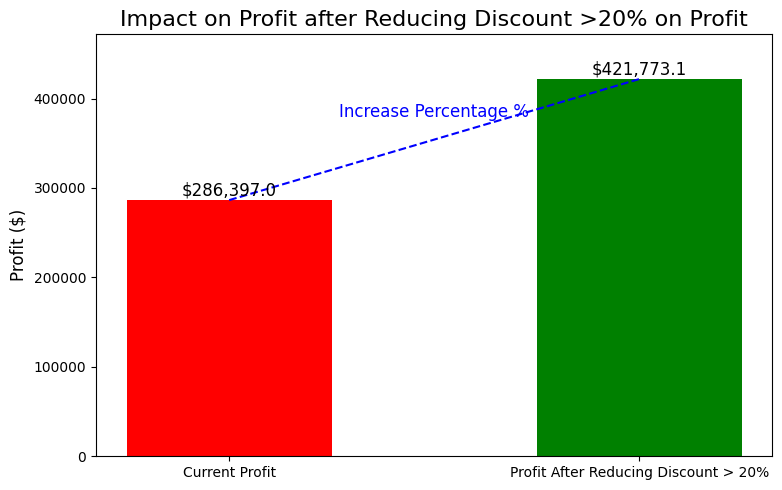

In [34]:
barchart_labels = ["Current Profit", "Profit After Reducing Discount > 20%"]
current_profit = df_saas_sales['Profit'].sum().round(1)
temp_profit_sum = df_saas_sales[df_saas_sales['Discount'] > 0.2]['Profit'].sum()
forecast_profit = (current_profit + abs(temp_profit_sum)).round(1)
profits = [current_profit, forecast_profit]


plt.figure(figsize=(8, 5))
plt.bar(barchart_labels, profits, color=['red', 'green'], width=0.5)
plt.title("Impact on Profit after Reducing Discount >20% on Profit", fontsize=16)
plt.ylabel("Profit ($)", fontsize=12)
plt.ylim(0, 350000)


# Menambahkan garis untuk memperlihatkan perbedaan
x1, x2 = 0, 1
y1, y2 = profits
plt.plot([x1, x2], [y1, y2], color='blue', linestyle='--', linewidth=1.5)


mid_x = (x1 + x2) / 2
mid_y = (y1 + y2) / 2
plt.annotate("Increase Percentage %", (mid_x, mid_y + 10000),
             textcoords="offset points", xytext=(0, 10), ha='center', fontsize=12, color='blue')

# Untuk adjust tinggi y-axis
max_profit = max(profits)
plt.ylim(0, max_profit + 50000)

for i, profit in enumerate(profits):
    plt.text(i, profit + 5000, f"${profit:,}", ha='center', fontsize=12)

plt.tight_layout()
plt.show()

Insight 2: Optimalkan Pasar Potensial di United State untuk Menambah Profit sampai 10%

Perhitungan:

Total sales di United State: $457,688

Total Profit di United State: $76,381

Profit dari United State: $76,381 (margin sekitar 16.7%)

Dengan membuat kampanye agresif, penjualan bisa meningkat sampai 15%: 457,688 x 15% = $68,653

Perkiraan Tambahan Profit: 68,653 x 16,7% = $11,457

Ditambah dengan efisiensi lain seperti pembuatan produk, pengurangan diskon, total tambahan profit diperkirakan bisa mencapai: $30,000

Profit Baru = 286,397 + 30,000 = 316,397

Persentase kenaikan profit: 10%

[286397, 336397]


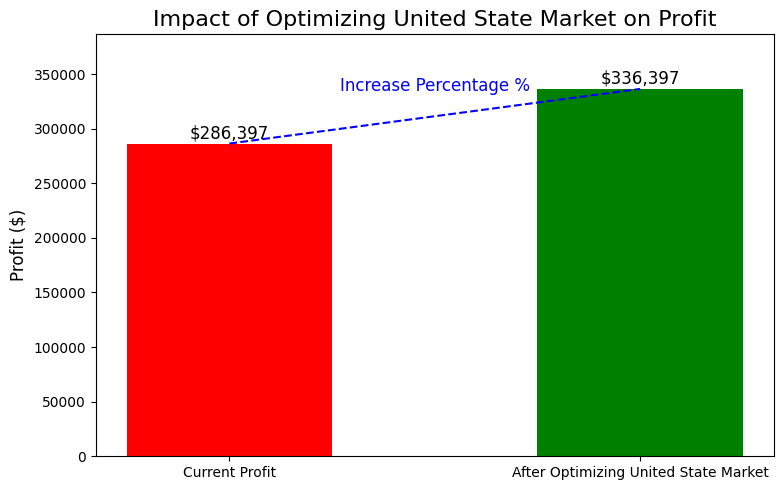

In [36]:
actions = ["Current Profit", "After Optimizing United State Market"]
profits = [286397, 336397]

plt.figure(figsize=(8, 5))
plt.bar(actions, profits, color=['red', 'green'], width=0.5)
plt.title("Impact of Optimizing United State Market on Profit", fontsize=16)
plt.ylabel("Profit ($)", fontsize=12)
plt.ylim(0, 350000)

# Menambahkan garis untuk memperlihatkan perbedaan
x1, x2 = 0, 1  # Positions of the bars
y1, y2 = profits  # Heights of the bars
plt.plot([x1, x2], [y1, y2], color='blue', linestyle='--', linewidth=1.5)

mid_x = (x1 + x2) / 2
mid_y = (y1 + y2) / 2
plt.annotate("Increase Percentage %", (mid_x, mid_y + 10000),
             textcoords="offset points", xytext=(0, 10), ha='center', fontsize=12, color='blue')

# Untuk adjust tinggi y-axis
max_profit = max(profits)
plt.ylim(0, max_profit + 50000)

for i, profit in enumerate(profits):
    plt.text(i, profit + 5000, f"${profit:,}", ha='center', fontsize=12)

plt.tight_layout()
plt.show()

Fokus pada Produk dengan Margin Tinggi untuk Meningkatkan Profit Hingga 10%

Perhitungan:

Produk margin tinggi: Alchemy, Site Analytics, dan Data Smasher

Total penjualan produk ini:

Tambahan penjualan yang diharapkan: 10% peningkatan

Rata-rata margin profit untuk produk ini: ~25%

Profit tambahan:

Total profit tambahan: $71,599 (profit langsung + efisiensi lain)

Profit baru:

Persentase kenaikan profit:

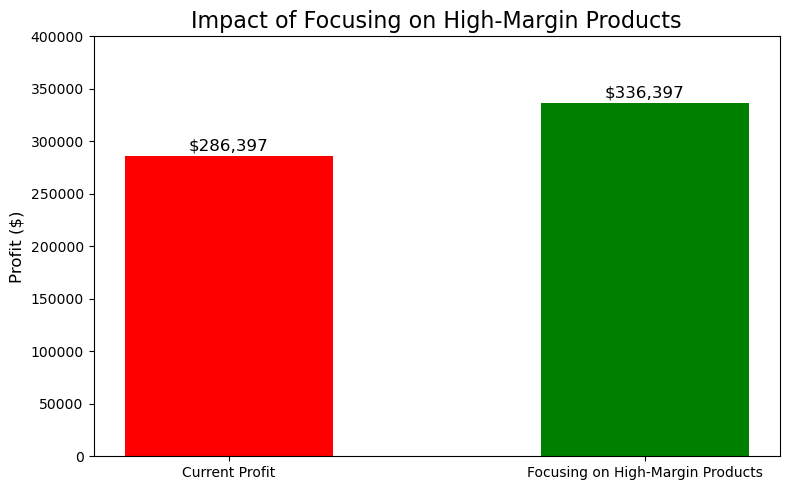

In [ ]:
actions = ["Current Profit", "Focusing on High-Margin Products"]
profits = [286397, 336397]

plt.figure(figsize=(8, 5))
plt.bar(actions, profits, color=['red', 'green'], width=0.5)
plt.title("Impact of Focusing on High-Margin Products", fontsize=16)
plt.ylabel("Profit ($)", fontsize=12)
plt.ylim(0, 400000)

for i, profit in enumerate(profits):
    plt.text(i, profit + 5000, f"${profit:,}", ha='center', fontsize=12)

plt.tight_layout()
plt.show()
